**Final Project Submission** 

Please fill out:
* Student name: Kristine Petrosyan
* Student pace: part time
* Scheduled project review date/time: 07/16/2020 11:00 AM CDT 
* Instructor name: Jacob Eli Thomas
* Blog post URL: https://medium.com/@kristinelpetrosyan/handling-missing-data-for-bank-marketing-dataset-8098385d489c


# Bank Marketing Campaign

This project was completed as part of Flatiron School's Data Science Bootcamp (Module 3 Final Project).

## Introduction


### Problem Statement


In module 3 final project, a famous dataset 'Bank Marketing' is chosen to work on. The aim of this project is to predict the result of target variable by applying machine learning classification models. The bank marketing data is obtained from mobile marketing campaigns of a Portuguese banking institution.

Banks generally use telemarketing when targeting segments of customers to meet predefined objectives. Contact centers by centralizing customer remote interactions simplifies management of campaigns.

In this sense, Machine Learning algorithms by modeling available information and customer metrics gathered from customer centers can help focusing on maximizing customer lifetime value and decrease the time and costs of such campaigns.

### Business Value
Of course the goal of this project is to use Data science tools to increase the revenue. We will use Machine learning models and will try to predict best segment for term deposit subscription. 

### Methodology

We will adopt the OSEMN data science workflow, which involves:
1. Obtain (import the data)
2. Scrub (clean the data, deal with missing values and data types)
3. Explore (answer descriptives questions using EDA)
4. Model (build our predictive model)
5. iNterpret (comment on our model and findings)
6. Conclusion

# Features

We have a dataset of 21 columns and 4188 entries:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

8 - contact: contact communication type (categorical: "cellular","telephone")

9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

16 - emp.var.rate: Employment variation is the variation of how many people are being hired or fired due to the shifts in the conditions of the economy. - quarterly indicator (numeric)

17 - cons.price.idx: The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. - monthly indicator (numeric)
18 - cons.conf.idx: Consumer confidence index (CCI) This consumer confidence indicator provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings. - monthly indicator (numeric)

19 - euribor3m: The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

## Obtain data

### Import Libraries

In [7]:
# Main libraries
import time
import pandas as pd
import numpy as np

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image  
from pydotplus import graph_from_dot_data

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer       
       
import six
import sys
sys.modules['sklearn.externals.six'] = six
# Surpress warnings
import warnings
warnings.filterwarnings('ignore')

random_state = 33

### Load Data

A dataset for this project has been provided and can be found in the `Data` folder in this repository.

Note that this exact dataset was found on <a href= 'https://www.kaggle.com/janiobachmann/bank-marketing-dataset'>Kaggle</a>. It is based on the dataset available from <a href = 'https://archive.ics.uci.edu/ml/datasets/Bank+Marketing'> UCI Machine Learning Repository</a>. 

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Let us begin by loading the data using Pandas.

In [8]:
# Obtaining the data and checking first five rows
df = pd.read_csv('data/bank.csv', sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

We see that we have 21 columns, with 20 feature columns and 1 target column. There are 41,188 observations recorded.

In [10]:
# Dimensions of Dataset
df.shape

(41188, 21)

In [11]:
# Checking for missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
#Statistical Summary
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
# class distribution
print(df.groupby('marital').size())

marital
divorced     4612
married     24928
single      11568
unknown        80
dtype: int64



## Scrub the Data


In [14]:
# Frequency of values of each column
for col in df.columns:
    try:
        print(col, df[col].value_counts(normalize=True)[:10])
    except:
        print(col, df[col].value_counts(normalize=True))

    print('\n')

age 31    0.047271
32    0.044819
33    0.044503
36    0.043216
35    0.042707
34    0.042367
30    0.041614
37    0.035811
29    0.035277
39    0.034767
Name: age, dtype: float64


job admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
Name: job, dtype: float64


marital married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64


education university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64


default no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64


ho

In [15]:
# Cleaning column names
df.columns = df.columns.str.replace('.', '_')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

It is observed that the target variable 'y' is imbalanced. It might cause a problem when applying classification models.

The data is already cleaned and there are no missing values. However, the unknown values will be treated as missing and dropped. Also, columns names and the values containing '.' will be cleaned.

### Additional cleaning steps

We see that there are unknown values in features job, marital, education, default, housing and loan, which we may want to address.

job

There is no dominating feature so we will replace it using the distance-based imputation method k-Nearest Neighbors Imputer some other time.

marital

The unknown values represent 0.2% of our dataset. We choose to replace the unknown values with the mode of the feature, which is married (60% of values.)

education

Similar to job, there is no dominating feature and so we will impute using the k-Nearest Neighbors Imputer when we prepare the data for modelling some other time.

default

The unknown values represent 0.008% of the dataset. We choose to replace the unknown values with no.

housing

We will choose to impute using the k-Nearest Neighbors Imputer when we prepare the data for modelling some other time.

loan

With 82% of the entries having value no and 2.4% of entries having value unknown, we think it best to replace the unknown values with no.

In [20]:
# Cleaning the values in 'education' column
df['education'] = df['education'].str.replace('.', '_')

In [21]:
# The unkown values in default column replaced with no
df['default'] = df['default'].replace('unknown', 'no')

In [22]:
# The unkown values replaced with None and then dropped
unknown_var_list = ['job','marital', 'education', 'loan', 'housing']

for col in unknown_var_list: 
    df[col] = df[col].replace('unknown', None)
    df[col] = df[col].fillna(df[col].mode())

### Imputation

In [23]:
# Create copy of X
#X_imputed = .copy(deep = True)

# Create imputer instance
#knn_imputer = KNNImputer()

# Apply imputer
#X_imputed.iloc[:,:] = knn_imputer.fit_transform(X_imputed)

# Check
#X_imputed.isna().any().any()

In [24]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1266,39,blue-collar,married,basic_6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
5664,56,blue-collar,married,basic_4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
12261,36,retired,married,university_degree,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional_course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high_school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional_course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
19608,33,admin.,married,university_degree,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
20216,55,services,married,high_school,no,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional_course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university_degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no


Since number of duplicate entries is not big we decided to keep them.



## Explore and Visualize Data

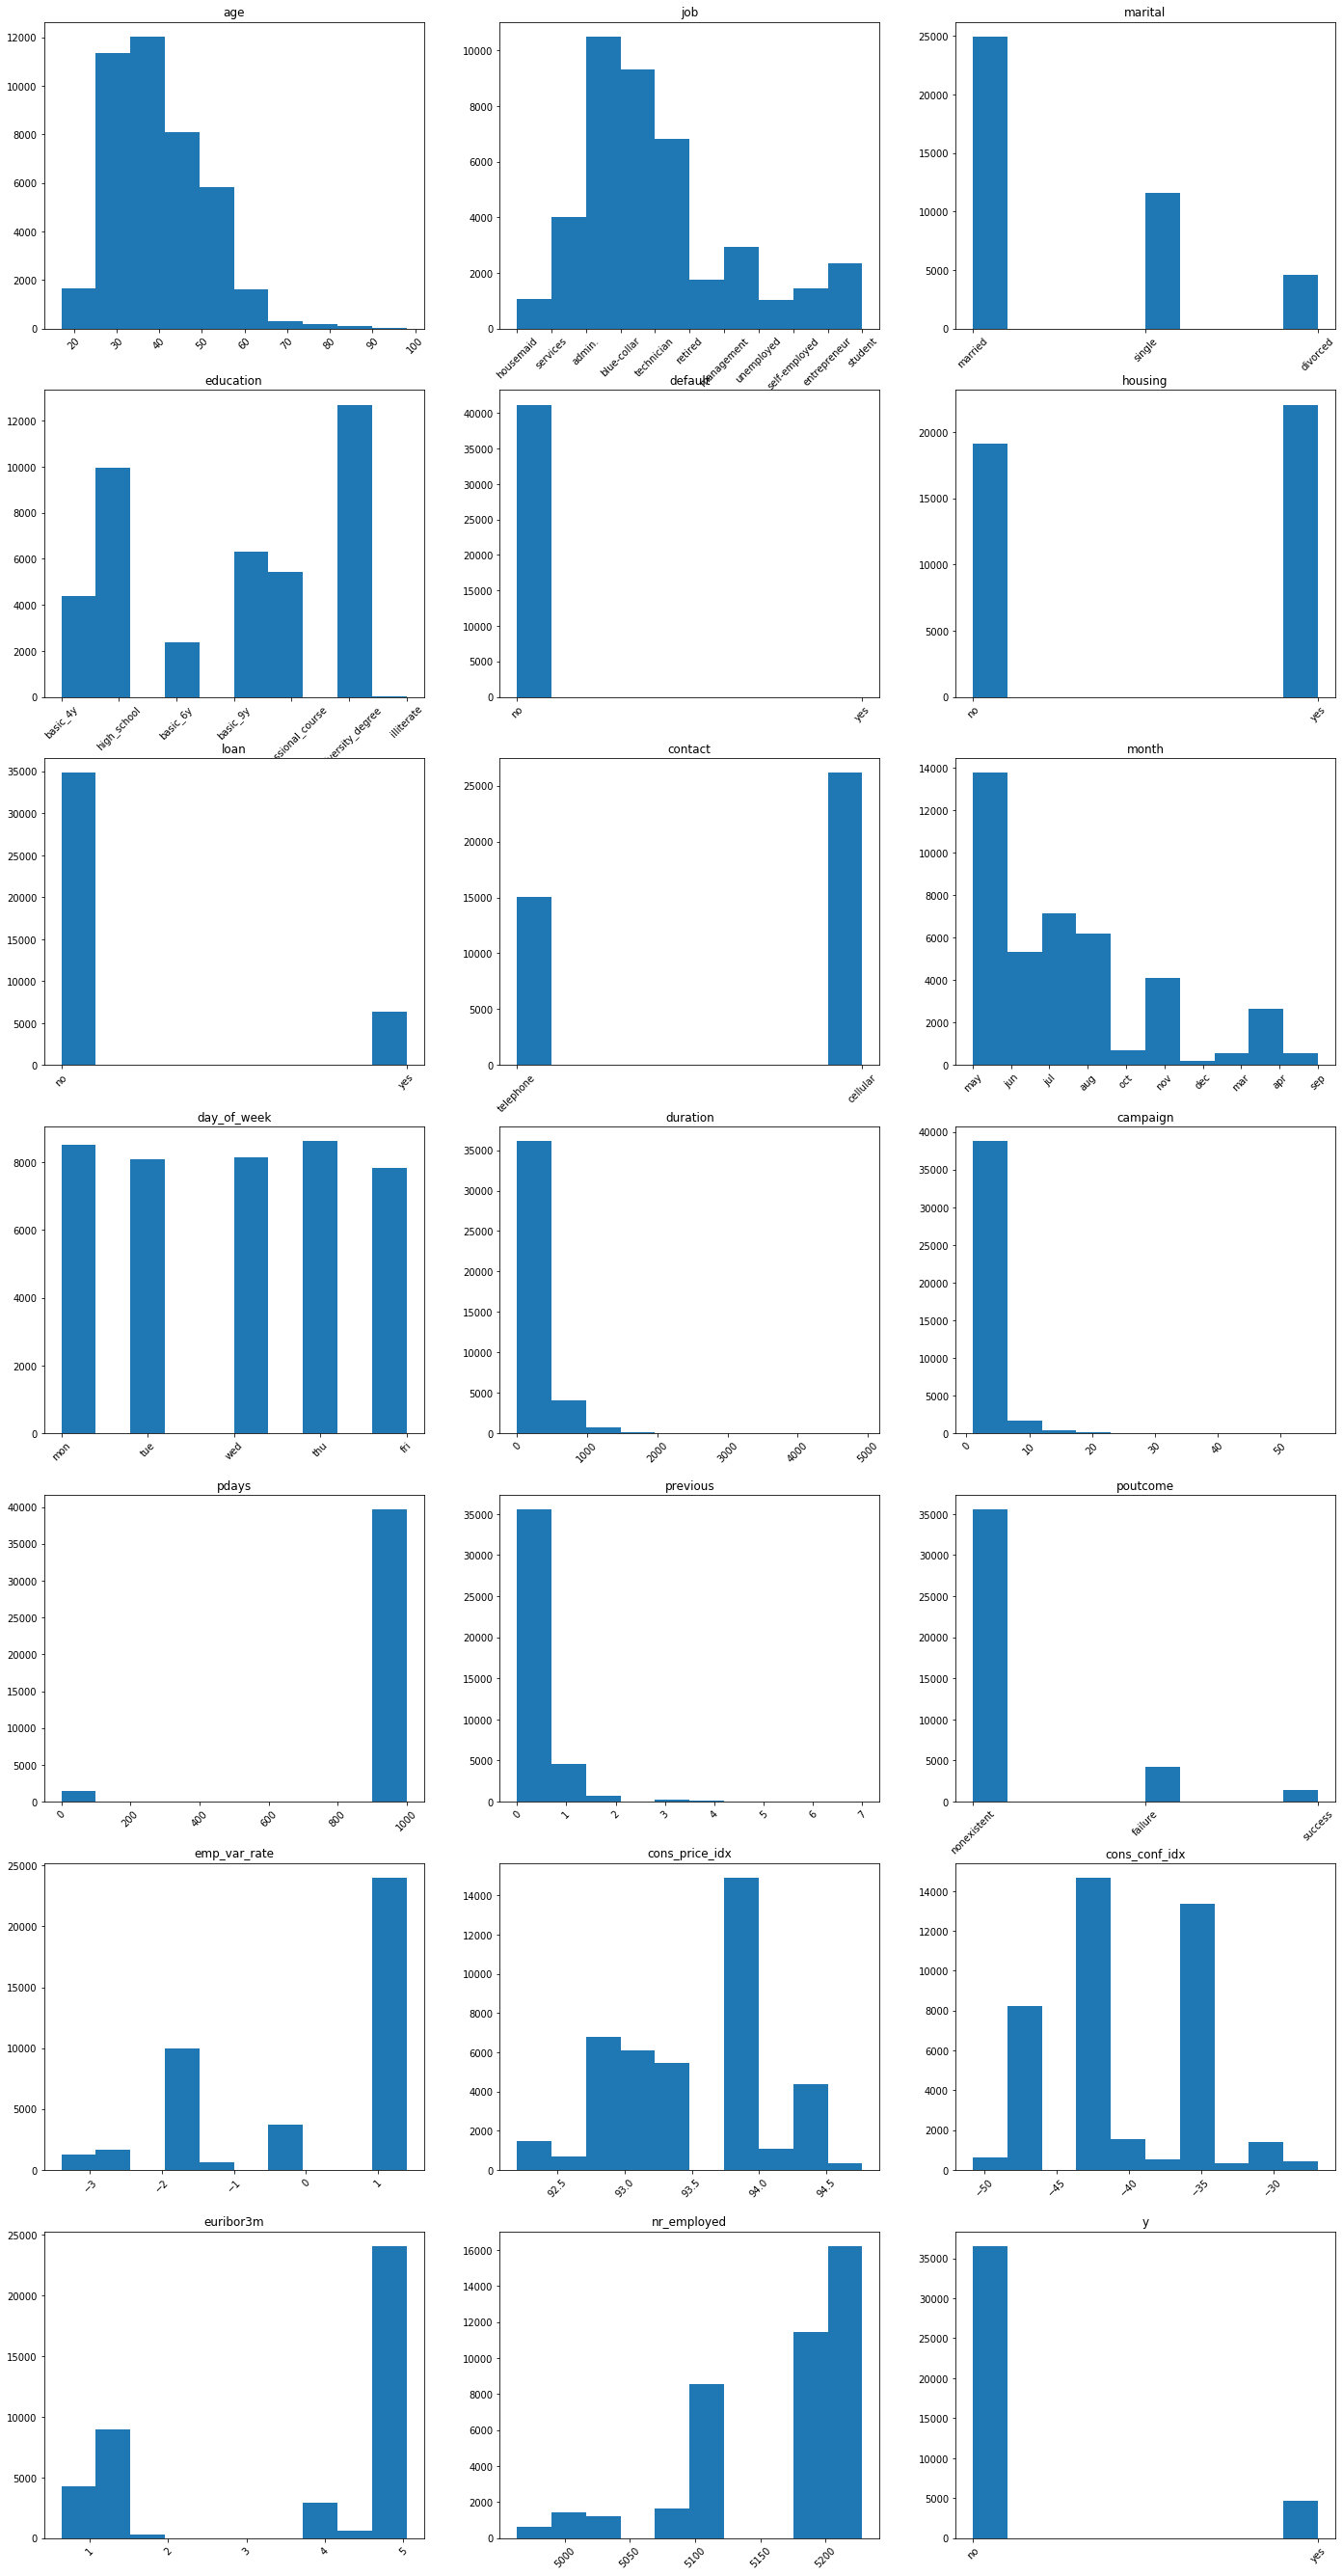

In [25]:
# Visualizing all the columns to see distributions
fig, axs = plt.subplots(7, 3, figsize=(24, 48))

counter = 0
for col in df.columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[col])    
    axs[trace_x, trace_y].set_title(col)
    
    counter += 1
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(45)

plt.show()


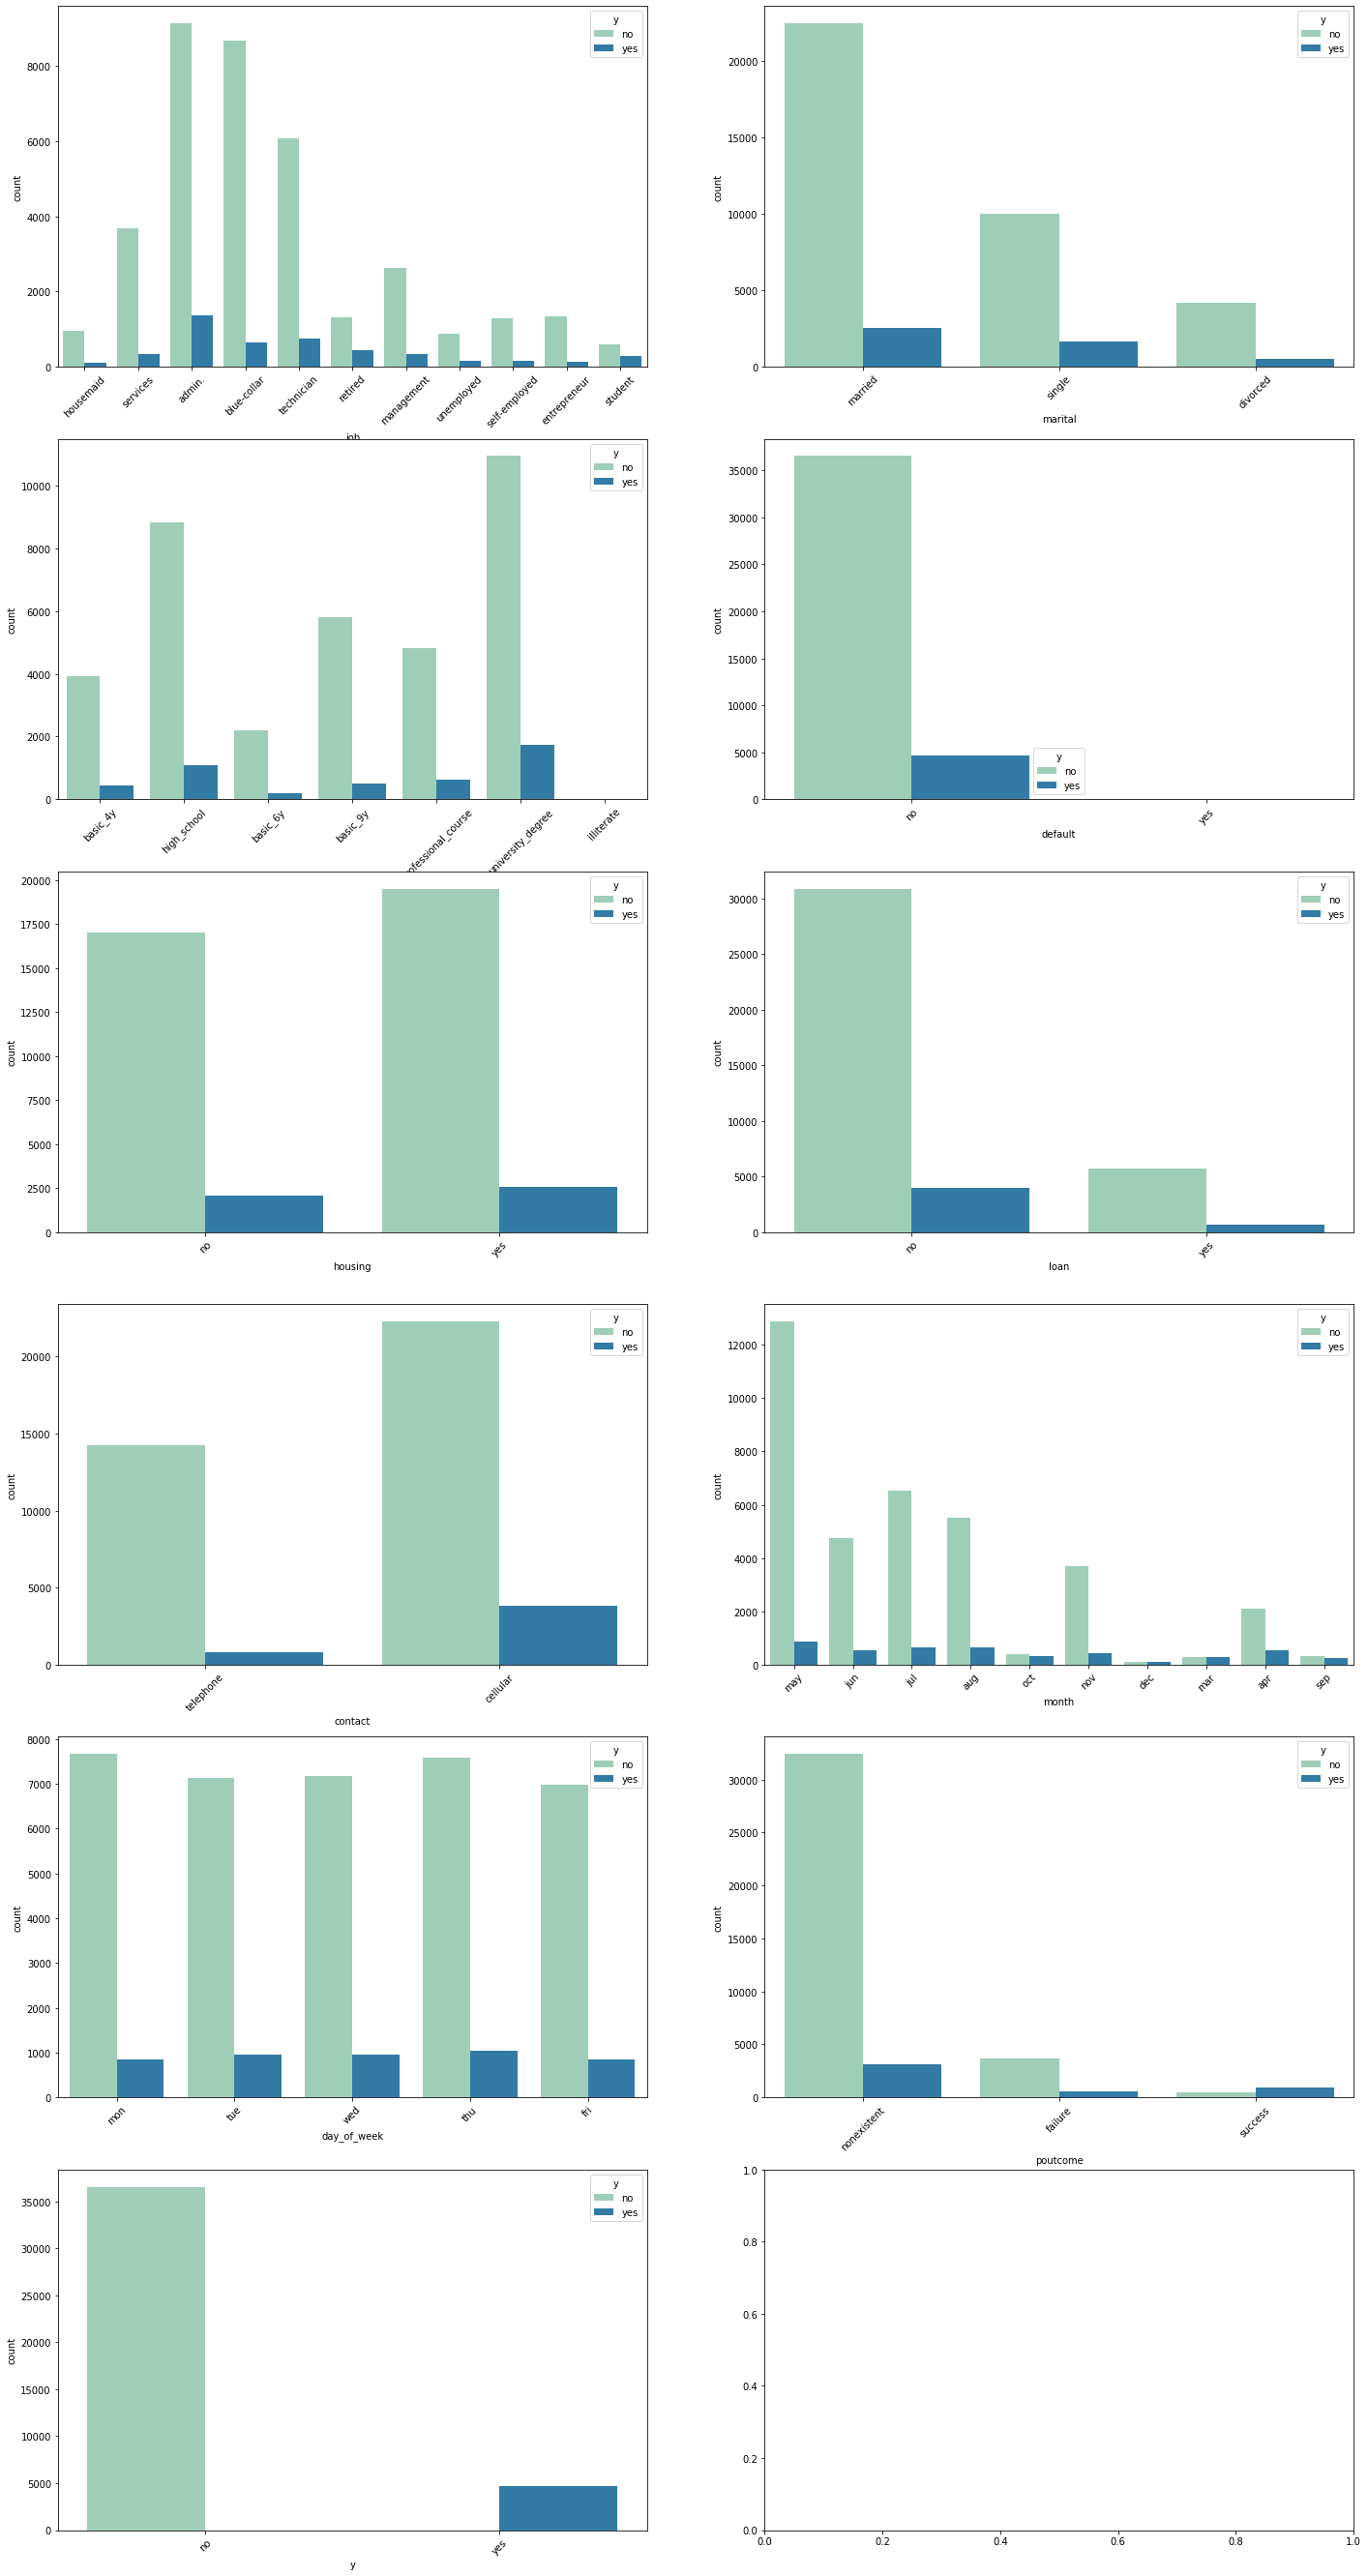

In [26]:
# Visualizing categorical columns with barplot
fig, ax = plt.subplots(6, 2, figsize=(24,48))
ax = ax.flatten()
for c, col in enumerate(df.select_dtypes('object')):
    sns.countplot(x=col, hue = df['y'], data=df, palette="YlGnBu", ax=ax[c])
    for tick in ax[c].get_xticklabels():
        tick.set_rotation(45)

Comments:

The marketing campaign mostly targeted people who:

- have administrative jobs,
- are married,
- have university degree,
- have credit default,
- have housing loan,
- doesn't have personal loan,
- have phone number.

It can be concluded that the campaign mostly targeted these segments which are more likely to subscribe for term deposit.

Also, May, July and August are the months that the campaign mostly took place.

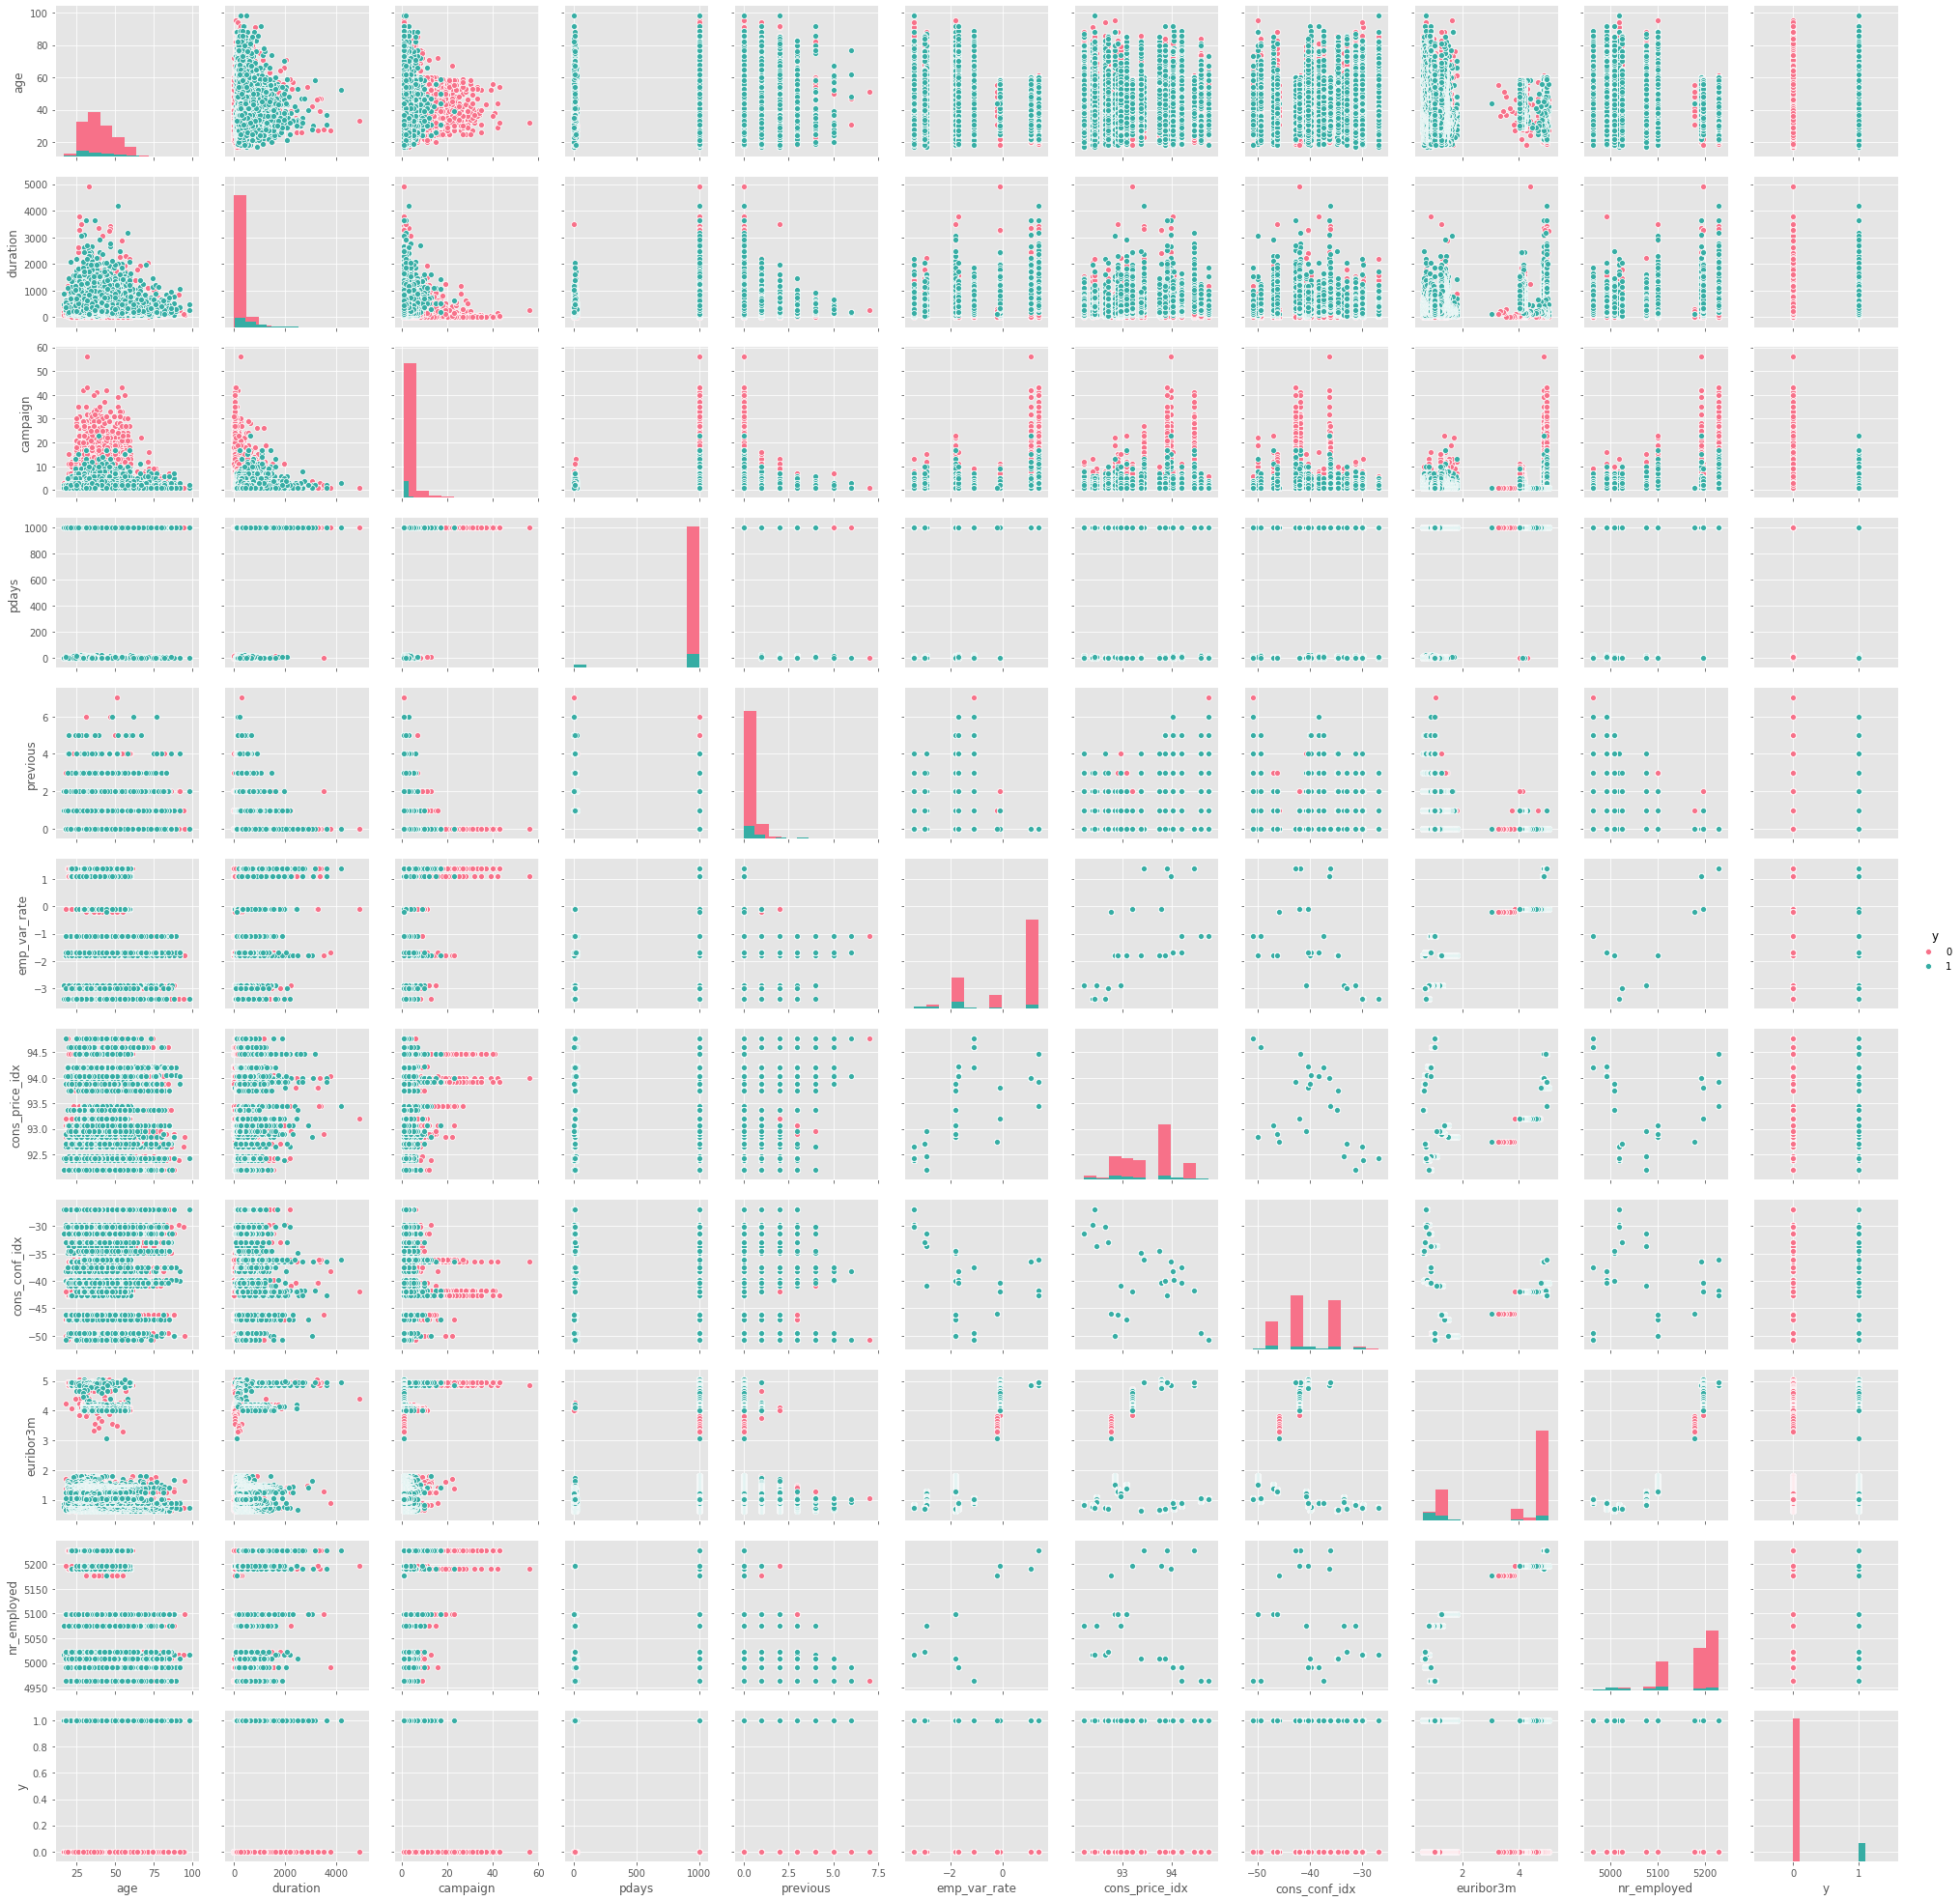

In [47]:
# Observing the relation between the features 

sns.pairplot(df, hue='y', diag_kind='hist', palette="husl")

plt.savefig('pairplot.png', dpi=300)
plt.show()

### Target Variable

### Feature Variables

In [28]:
# Correlation between the continuous features 
abs(df.corr()) > 0.75

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,True,False,False,False,False,False,False,False,False,False
duration,False,True,False,False,False,False,False,False,False,False
campaign,False,False,True,False,False,False,False,False,False,False
pdays,False,False,False,True,False,False,False,False,False,False
previous,False,False,False,False,True,False,False,False,False,False
emp_var_rate,False,False,False,False,False,True,True,False,True,True
cons_price_idx,False,False,False,False,False,True,True,False,False,False
cons_conf_idx,False,False,False,False,False,False,False,True,False,False
euribor3m,False,False,False,False,False,True,False,False,True,True
nr_employed,False,False,False,False,False,True,False,False,True,True


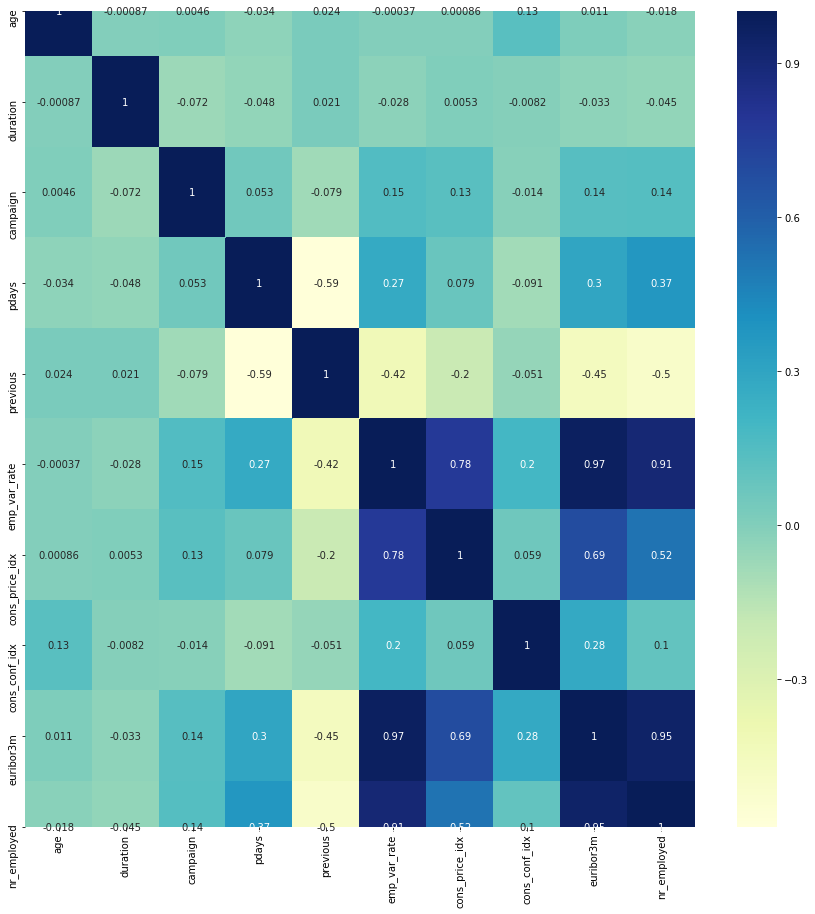

In [29]:
# Visualizing the correlation
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

There is high correlation between;

nr_employed and emp_var_rate,
nr_employed and euribor3m,
emp_var_rate and euribor3m,
cons_price_idx and emp_var_rate.

In [30]:
# Getting dummy variables for categorical data
df_cat = pd.get_dummies(df[df.select_dtypes('object').columns.tolist()], drop_first=True)
df_cat.drop(columns='y_yes', inplace=True)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 37 columns):
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student                      41188 non-null uint8
job_technician                   41188 non-null uint8
job_unemployed                   41188 non-null uint8
marital_married                  41188 non-null uint8
marital_single                   41188 non-null uint8
education_basic_6y               41188 non-null uint8
education_basic_9y               41188 non-null uint8
education_high_school            41188 non-null uint8
education_illiterate             41188 non-null uint8
education_professional_cour

In [31]:
# Storing numeric data 
df_num = df.select_dtypes(include = np.number)

In [32]:

# Merging numeric and dummy variables
X = pd.concat([df_cat, df_num], axis = 1)
X.shape

(41188, 47)

In [33]:
# Replacing 'yes' and 'no'
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

# Defining X and y before modelling
y = df['y']
X = X.drop(['duration'], axis=1)

Helper function
There are five helper functions created to avoid repetitive coding which are for plotting confusion matrix and roc curve, sampling data, printing accuracy report and applying grid search.

In [34]:
# Run this lines to flush py files cache
%reload_ext autoreload
%autoreload 2

# Import helper functions
from helper import sampled
from helper import print_accuracy_report
from helper import plot_con_matrix, plot_roc_curve

## Prepare Data for Modelling

### Feature Scaling

In [35]:
# Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=random_state, test_size=0.2)

# Resampling due to class imbalance
X_train_resampled, y_train_resampled = sampled(X_train, y_train)

In [36]:
plot_decision_tree_graph = False

### Categorical Variable Encoding

In [37]:
# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}

# Loop over categorical columns
for col_name in df_cat:
    
    # Create ordinal encoder instance
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    
    # Select non-null values
    col = X[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1,1)
    
    # Encode non-null values in column
    ordinal_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Update non-null values in X with encoded values
    X.loc[col.notnull(), col_name] = np.squeeze(ordinal_vals)



## Modelling

###  Logistic Regression

In [38]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, random_state=random_state)
classifier = logreg.fit(X_train_resampled, y_train_resampled)

### Choice of Evaluation Metric



Training Accuracy: 74.34%
Validation Accuracy: 82.11%
F1 Score: 0.45%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7305
           1       0.35      0.65      0.45       933

    accuracy                           0.82      8238
   macro avg       0.65      0.74      0.67      8238
weighted avg       0.88      0.82      0.84      8238






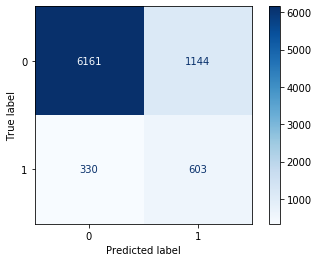

In [39]:
y_pred = logreg.predict(X_test)

# Print accuracy report
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, logreg)
print('\n\n')

# Get class labels to add to matrix
class_names = set(y) 
# Plot confustion matrix 

from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives:  6161 is the number of correct classifications of the 0/No.

False Negatives:  1144 is the number of incorrect classifications 0/No.

False Positives:  330 is the number of incorrect classifications of the 1/Yes.

True Positives:  603 is the number of correct classifications of the 1/Yes.

In [40]:
#probability scores of each of the datapoints:
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print(f'\n\nAUC: {auc(fpr, tpr)}\n\n')



AUC: 0.8007231242017353




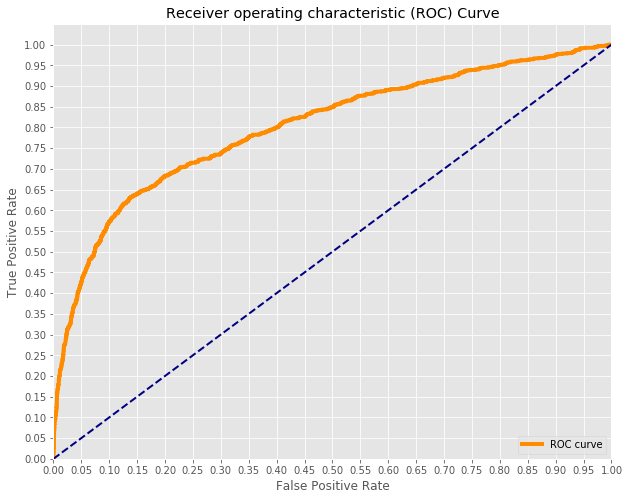

In [41]:
# Plot ROC curve
plot_roc_curve(fpr, tpr)

### Decision tree



Training Accuracy: 99.73%
Validation Accuracy: 83.92%
F1 Score: 0.3318%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7305
           1       0.31      0.35      0.33       933

    accuracy                           0.84      8238
   macro avg       0.61      0.63      0.62      8238
weighted avg       0.85      0.84      0.84      8238






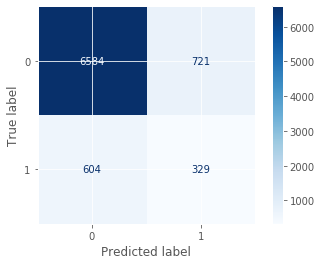

In [42]:
# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=random_state)  
classifier = tree_clf.fit(X_train_resampled, y_train_resampled) 

# Predicted values
y_pred = tree_clf.predict(X_test)

# accuracy report
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, tree_clf)
print('\n\n')

plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives:  6584 is the number of correct classifications of the 0/No.

False Negatives: 721 is the number of incorrect classifications 0/No.

False Positives: 604 is the number of incorrect classifications of the 1/Yes.

True Positives: 329 is the number of correct classifications of the 1/Yes.

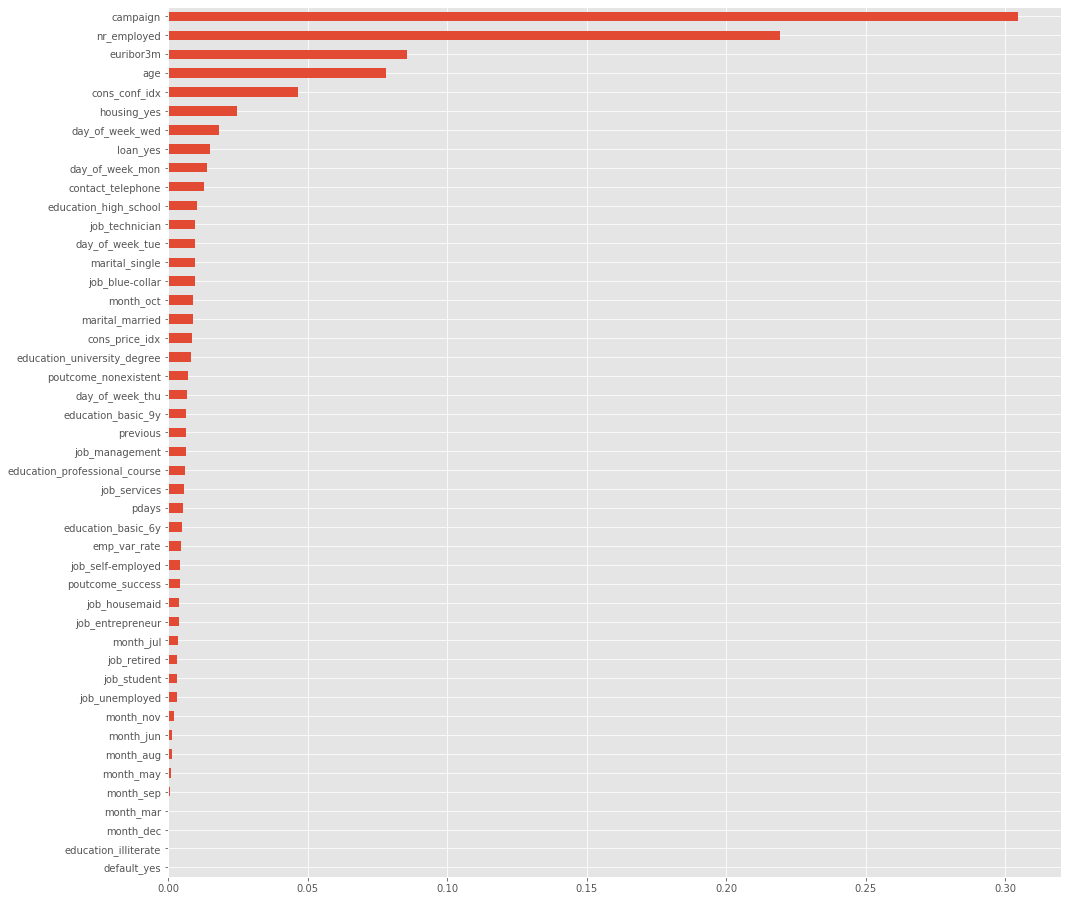

In [43]:
feat_importances = pd.Series(tree_clf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(16,16))
plt.show();

### KNN classifier



Training Accuracy: 91.95%
Validation Accuracy: 78.45%
F1 Score: 0.3543%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      7305
           1       0.27      0.52      0.35       933

    accuracy                           0.78      8238
   macro avg       0.60      0.67      0.61      8238
weighted avg       0.86      0.78      0.81      8238






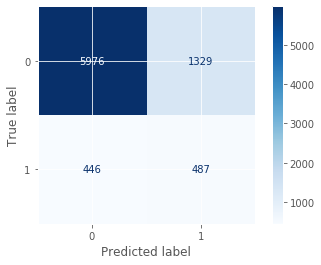

In [44]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Fit the classifier
classifier = knn_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = knn_clf.predict(X_test)

# accuracy report
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, knn_clf)
print('\n\n')

plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives: 5976 is the number of correct classifications of the 0/No.

False Negatives: 1329 is the number of incorrect classifications 0/No.

False Positives: 446 is the number of incorrect classifications of the 1/Yes.

True Positives: 487 is the number of correct classifications of the 1/Yes.

### Random forest classifier



Training Accuracy: 99.73%
Validation Accuracy: 88.3%
F1 Score: 0.4071%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7305
           1       0.48      0.35      0.41       933

    accuracy                           0.88      8238
   macro avg       0.70      0.65      0.67      8238
weighted avg       0.87      0.88      0.88      8238






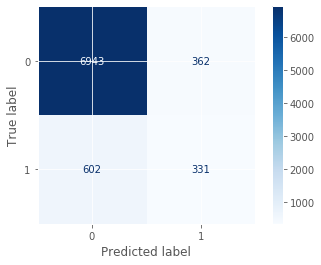

In [45]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=random_state)
classifier = rf_clf.fit(X_train_resampled, y_train_resampled) 

# Predicted values
y_pred = rf_clf.predict(X_test)

# Print accuracy report
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, rf_clf)
print('\n\n')

plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives:  6943 is the number of correct classifications of the 0/No.

False Negatives: 362 is the number of incorrect classifications 0/No.

False Positives: 602 is the number of incorrect classifications of the 1/Yes.

True Positives: 331 is the number of correct classifications of the 1/Yes.

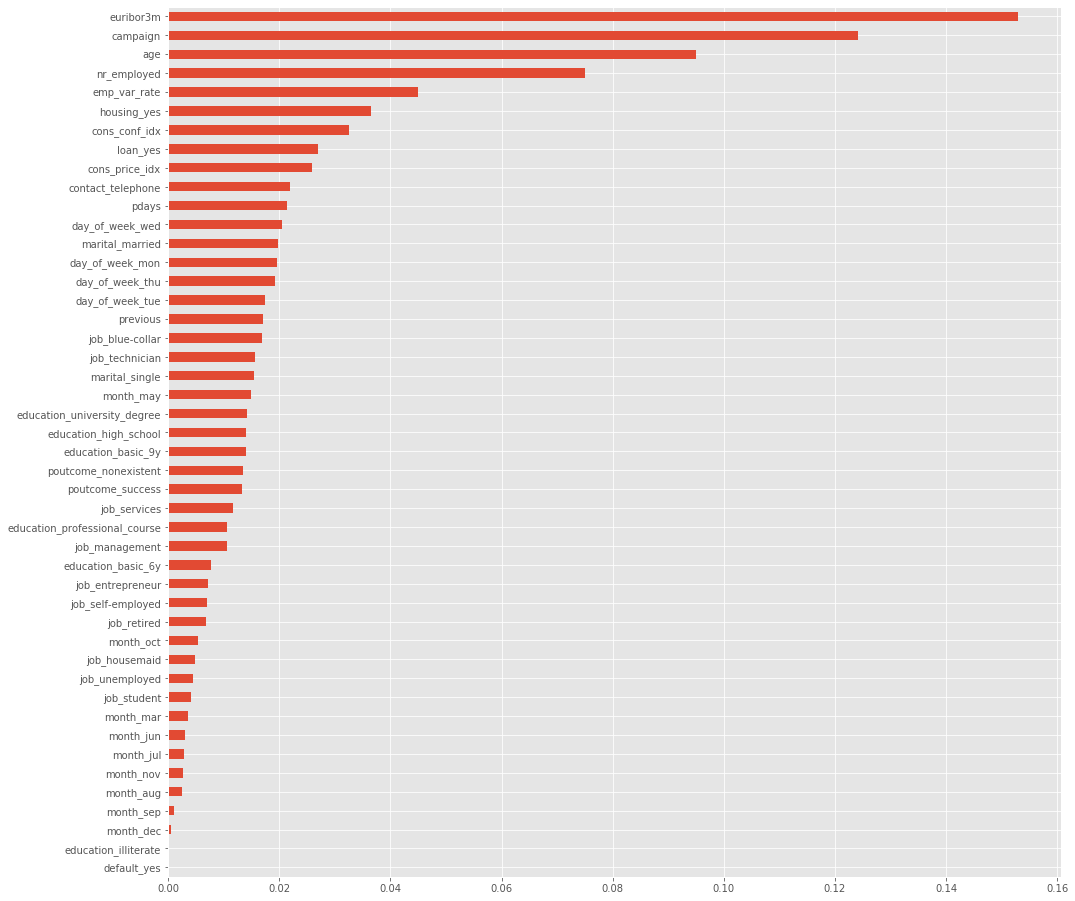

In [80]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(16,16))
plt.show();

### XGBoost



Training Accuracy: 88.52%
Validation Accuracy: 88.42%
F1 Score: 0.4979%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7305
           1       0.49      0.51      0.50       933

    accuracy                           0.88      8238
   macro avg       0.71      0.72      0.72      8238
weighted avg       0.89      0.88      0.89      8238






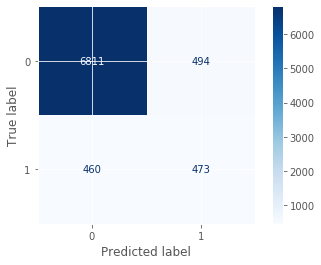

In [49]:
xgb_clf = xgb.XGBClassifier(random_state=random_state)
classifier = xgb_clf.fit(X_train_resampled, y_train_resampled)

# Predicted values
y_pred = xgb_clf.predict(X_test)

# Print accuracy report
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, xgb_clf)
print('\n\n')

plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives: 6811 is the number of correct classifications of the 0/No.

False Negatives: 494 is the number of incorrect classifications 0/No.

False Positives: 460 is the number of incorrect classifications of the 1/Yes.

True Positives: 473 is the number of correct classifications of the 1/Yes.

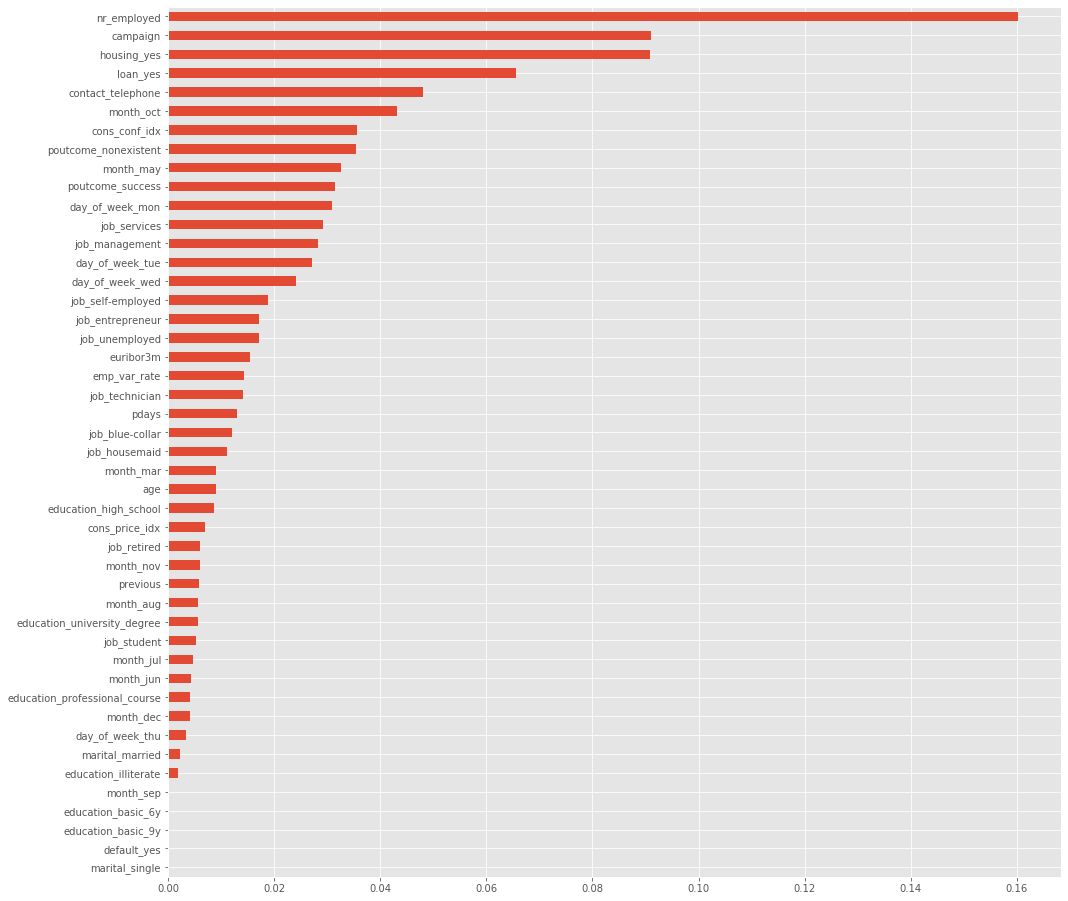

In [81]:
feat_importances = pd.Series(xgb_clf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(16,16))
plt.show();

### Naive Bayes



Training Accuracy: 71.45%
Validation Accuracy: 75.25%
F1 Score: 0.386%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      7305
           1       0.27      0.69      0.39       933

    accuracy                           0.75      8238
   macro avg       0.61      0.72      0.62      8238
weighted avg       0.87      0.75      0.79      8238






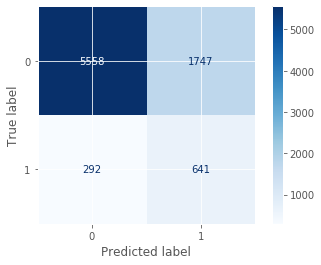

In [51]:

nb_clf = GaussianNB()
classifier = nb_clf.fit(X_train_resampled, y_train_resampled)

# Predicted values
y_pred = nb_clf.predict(X_test)

# Print accuracy report
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, nb_clf)
print('\n\n')

# Plot confusion matrix
plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives: 5558 is the number of correct classifications of the 0/No.

False Negatives: 1747 is the number of incorrect classifications 0/No.

False Positives: 292 is the number of incorrect classifications of the 1/Yes.

True Positives: 641 is the number of correct classifications of the 1/Yes.

Among baseline models Naive Bayes and Random Forest are the most successful ones in predicting both target variable 0 and 1, thus have the highest f1 scores.

## Tuning

### GridSearch for Logistic Regression


In [83]:
from helper import grid_search
import joblib
apply_grid_search = False
import json

# Creating an empty dictionary to store best parameter of gridsearch for each model
all_best_params = {}

In [84]:
# Applying Gridsearch for Logistic Regression
model = LogisticRegression()
model_name = 'Logistic Regression'

# Defining params dictionary 
grid_params = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(0, 4, 10),
    'solver' : ['liblinear'],
    'random_state': [random_state],
}

if apply_grid_search:
    best_params = grid_search(X_train_resampled, X_test, y_train_resampled, y_test, model, model_name, grid_params)
    all_best_params[model_name] = best_params
else:
    pass



Training Accuracy: 74.33%
Validation Accuracy: 81.95%
F1 Score: 0.4478%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7305
           1       0.34      0.65      0.45       933

    accuracy                           0.82      8238
   macro avg       0.65      0.74      0.67      8238
weighted avg       0.88      0.82      0.84      8238





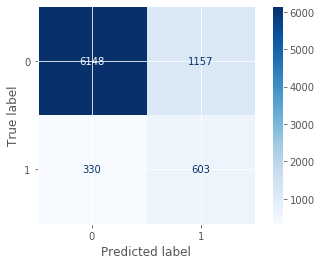

In [54]:
# Load previously saved model
model_name = model_name.lower().replace(' ', '_')
model = joblib.load(f'{model_name}_gridsearch_output_model.pkl')

y_pred = model.predict(X_test) 
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, model)
print('\n')
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives: 6148 is the number of correct classifications of the 0/No.

False Negatives: 1157 is the number of incorrect classifications 0/No.

False Positives: 330 is the number of incorrect classifications of the 1/Yes.

True Positives: 603 is the number of correct classifications of the 1/Yes.

Gridsearch didn't really show any significant effect on Logistic Regression.

### GridSearch for Decision Tree


In [87]:
model = DecisionTreeClassifier()
model_name = 'Decision Tree'

grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'random_state': [random_state],
}

if apply_grid_search:
    best_params = grid_search(X_train_resampled, X_test, y_train_resampled, y_test, model, model_name, grid_params)
    all_best_params[model_name] = best_params
else:
    pass



Training Accuracy: 80.06%
Validation Accuracy: 87.18%
F1 Score: 0.4976%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7305
           1       0.45      0.56      0.50       933

    accuracy                           0.87      8238
   macro avg       0.69      0.74      0.71      8238
weighted avg       0.89      0.87      0.88      8238





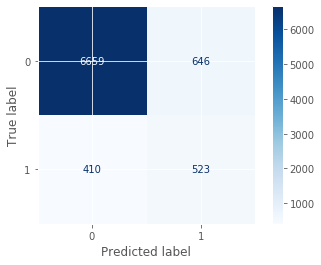

In [88]:
# Load previously saved model
model_name = model_name.lower().replace(' ', '_')
model = joblib.load(f'{model_name}_gridsearch_output_model.pkl')

y_pred = model.predict(X_test) 
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, model)
print('\n')
 
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

The baseline Decision Tree let to be overfit since any parameters didn't set. The results with gridsearch are still overfitting. F1 score is increased but still away from being satisfactory.

True Negatives: 6659 is the number of correct classifications of the 0/No.

False Negatives: 646 is the number of incorrect classifications 0/No.

False Positives: 410 is the number of incorrect classifications of 1/Yes.

True Positives: 523 is the number of correct classifications of 1/Yes.

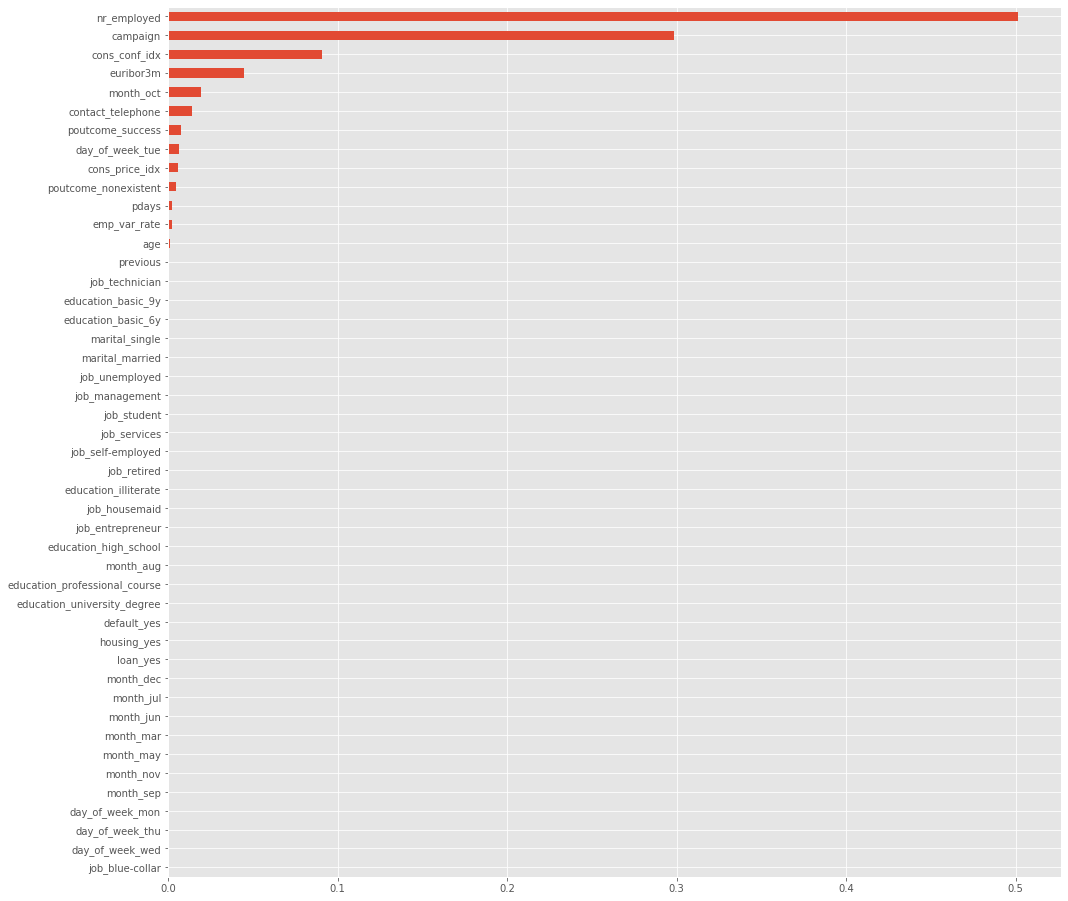

In [90]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(16,16))
plt.show();

### GridSearch for Random Forest


In [91]:
model = RandomForestClassifier()
model_name = 'Random Forest'

grid_params = {
    'n_estimators': [150, 250],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6],
    'random_state': [random_state],
}

if apply_grid_search:
    best_params = grid_search(X_train_resampled, X_test, y_train_resampled, y_test, model, model_name, grid_params)
    all_best_params[model_name] = best_params
else:
    pass



Training Accuracy: 75.95%
Validation Accuracy: 84.07%
F1 Score: 0.4705%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7305
           1       0.38      0.62      0.47       933

    accuracy                           0.84      8238
   macro avg       0.66      0.75      0.69      8238
weighted avg       0.88      0.84      0.86      8238





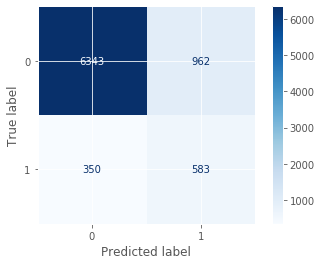

In [92]:
# Load previously saved model
model_name = model_name.lower().replace(' ', '_')
model = joblib.load(f'{model_name}_gridsearch_output_model.pkl')

y_pred = model.predict(X_test) 
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, model)
print('\n')
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives: 6343 is the number of correct classifications of the 0/No.

False Negatives: 962 is the number of incorrect classifications 0/No.

False Positives: 350 is the number of incorrect classifications of 1/Yes.

True Positives: 583 is the number of correct classifications of 1/Yes.

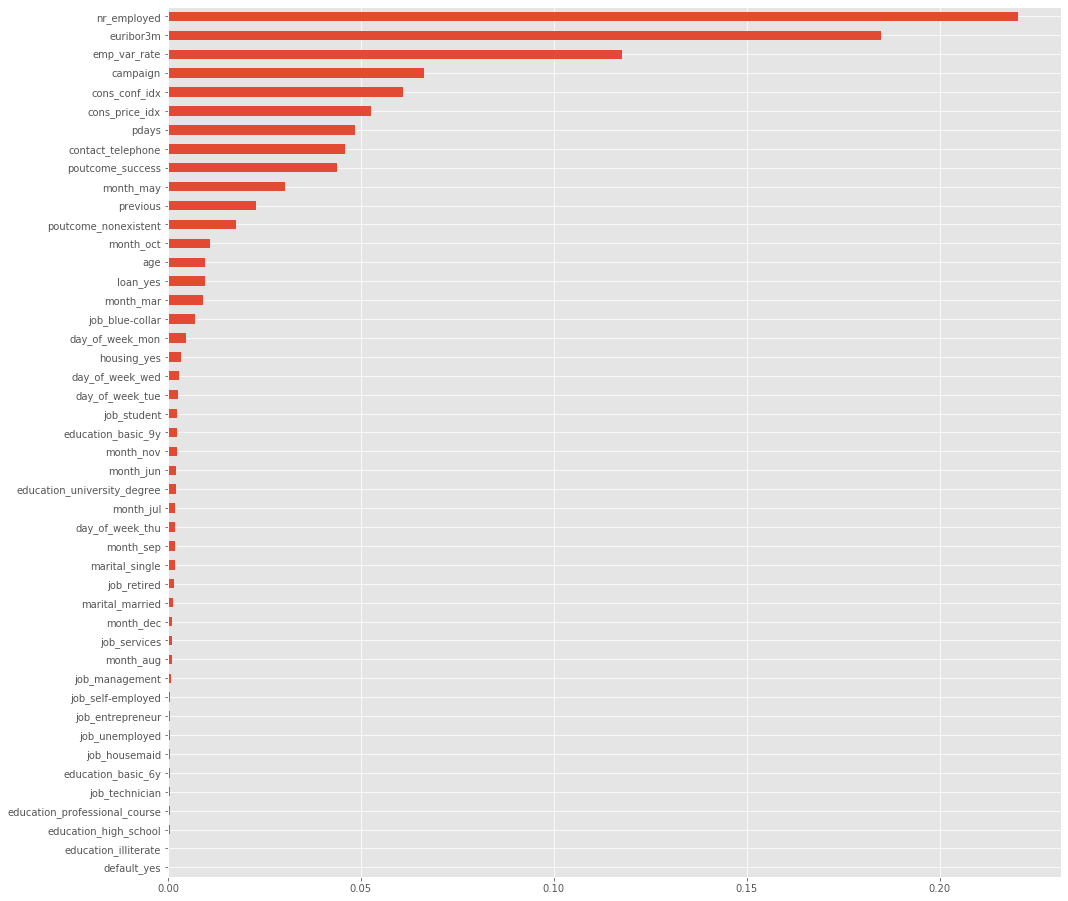

In [93]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(16,16))
plt.show();

### GridSearch for XGBoost

In [74]:
model = xgb.XGBClassifier()
model_name = 'XGBoost Classifier'

grid_params = {
    'learning_rate': [0.007],
    'max_depth': [3, 4, 5],
    'gamma': [2],
    'min_child_weight': [10],
    'subsample': [0.6, 0.7],
    'colsample_bytree': [0.7, 0.8],
    'n_estimators': [200, 300],
    'grow_policy':['depthwise'],
    'booster': ['dart'],
    'random_state': [random_state],
    'tree_method': ['hist'],
}

if apply_grid_search:
    best_params = grid_search(X_train, X_test, y_train, y_test, model, model_name, grid_params, cv=5)
    all_best_params[model_name] = best_params
else:
    pass

Optimal parameters: {'booster': 'dart', 'colsample_bytree': 0.7, 'gamma': 2, 'grow_policy': 'depthwise', 'learning_rate': 0.007, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 300, 'random_state': 33, 'subsample': 0.6, 'tree_method': 'hist'}


Training Accuracy: 89.98%


Test Accuracy: 90.30%


Model saved successfully!




Training Accuracy: 59.9%
Validation Accuracy: 90.3%
F1 Score: 0.3445%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7305
           1       0.73      0.23      0.34       933

    accuracy                           0.90      8238
   macro avg       0.82      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238





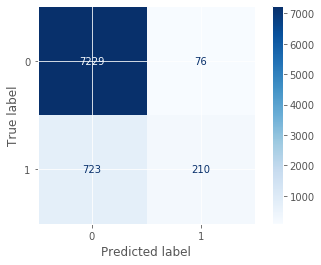

In [75]:
# Load previously saved model
model_name = model_name.lower().replace(' ', '_')
model = joblib.load(f'{model_name}_gridsearch_output_model.pkl')

y_pred = model.predict(X_test) 
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, model)
print('\n') 
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives: 7229 is the number of correct classifications of the 0/No.

False Negatives: 76 is the number of incorrect classifications 0/No.

False Positives: 723 is the number of incorrect classifications of 1/Yes.

True Positives: 210 is the number of correct classifications of 1/Yes.

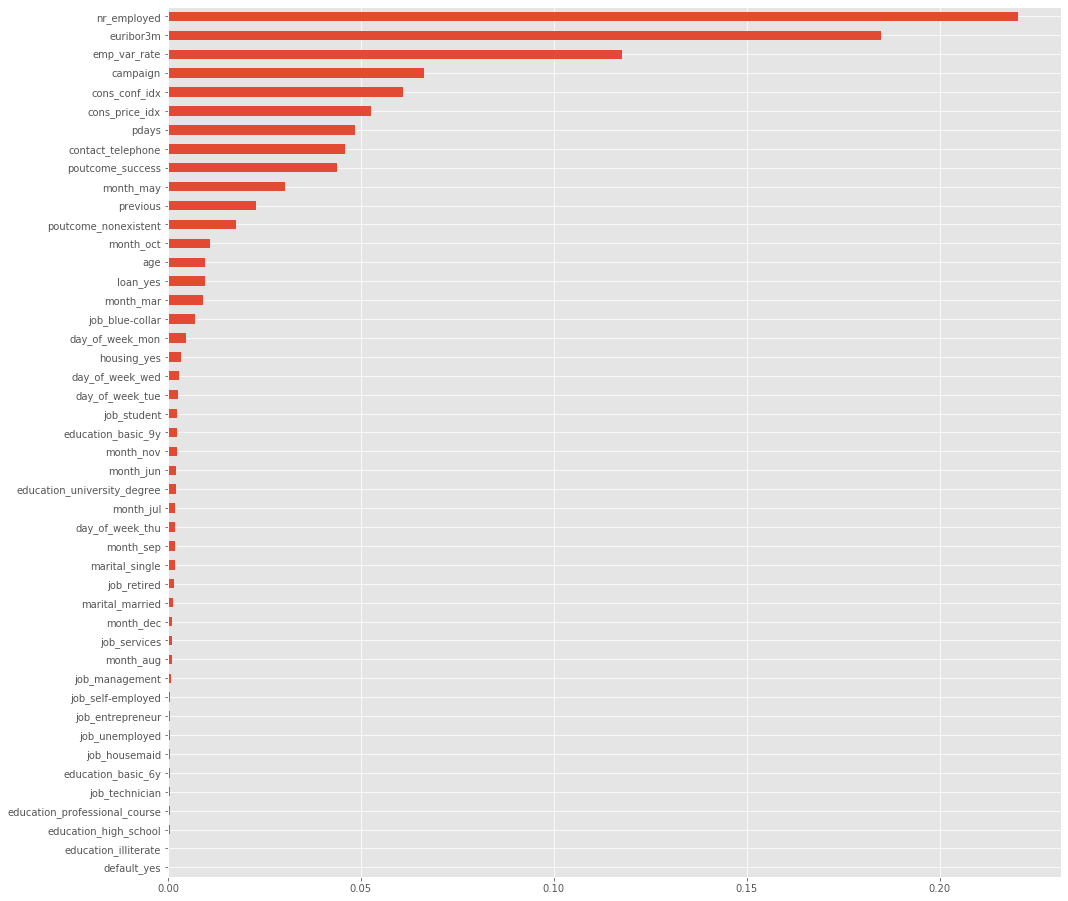

In [94]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(16,16))
plt.show();

### GridSearch for Naive Bayes Classifier

In [68]:
model = GaussianNB()
model_name = 'Naive Bayes'

grid_params = {}

if apply_grid_search:
    best_params = grid_search(X_train_resampled, X_test, y_train_resampled, y_test, model, model_name, grid_params)
    all_best_params[model_name] = best_params
else:
    pass

Optimal parameters: {}


Training Accuracy: 70.07%


Test Accuracy: 75.25%


Model saved successfully!




Training Accuracy: 71.45%
Validation Accuracy: 75.25%
F1 Score: 0.386%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      7305
           1       0.27      0.69      0.39       933

    accuracy                           0.75      8238
   macro avg       0.61      0.72      0.62      8238
weighted avg       0.87      0.75      0.79      8238





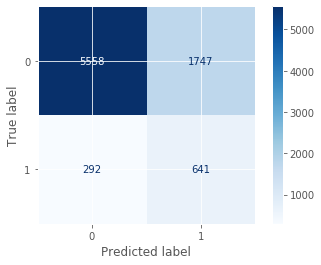

In [69]:
 #Load previously saved model
model_name = model_name.lower().replace(' ', '_')
model = joblib.load(f'{model_name}_gridsearch_output_model.pkl')

y_pred = model.predict(X_test) 
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, model)
print('\n') 
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

### GridSearch for KNN

In [70]:
model = KNeighborsClassifier()
model_name = 'KNN'

grid_params = {

}

if apply_grid_search:
    best_params = grid_search(X_train_resampled, X_test, y_train_resampled, y_test, model, model_name, grid_params)
    all_best_params[model_name] = best_params
else:
    pass

Optimal parameters: {}


Training Accuracy: 85.28%


Test Accuracy: 78.45%


Model saved successfully!


In [71]:
# Save best model parameters to a json file

if all_best_params:
    with open('best_model_params.json', 'w') as f:
        json.dump(all_best_params, f)
else:
    pass



Training Accuracy: 91.95%
Validation Accuracy: 78.45%
F1 Score: 0.3543%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      7305
           1       0.27      0.52      0.35       933

    accuracy                           0.78      8238
   macro avg       0.60      0.67      0.61      8238
weighted avg       0.86      0.78      0.81      8238





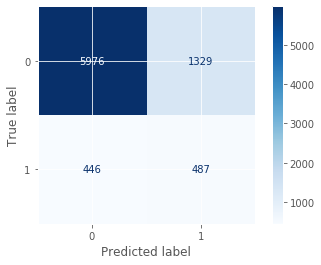

In [72]:
 #Load previously saved model
model_name = model_name.lower().replace(' ', '_')
model = joblib.load(f'{model_name}_gridsearch_output_model.pkl')

y_pred = model.predict(X_test) 
print_accuracy_report(X_train_resampled, X_test, y_train_resampled, y_test, model)
print('\n') 
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives: 5976 is the number of correct classifications of the 0/No.

False Negatives: 1329 is the number of incorrect classifications 0/No.

False Positives: 446 is the number of incorrect classifications of the 1/Yes.

True Positives: 487 is the number of correct classifications of the 1/Yes.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import tree

# Construct pipeline
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('pca', PCA(n_components=2)),
                 ('clf', tree.DecisionTreeClassifier(random_state=random_state))])

param_range = [1, 2, 3, 4, 5]

# Set grid search params
grid_params = [{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__max_depth': param_range,
                'clf__min_samples_split': param_range[1:],}]

# Construct grid search
gs = GridSearchCV(estimator=pipe,
                  param_grid=grid_params,
                  scoring='accuracy',
                  cv=10)

# Fit using grid search
gs.fit(X_train_resampled, y_train_resampled)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('dtr_clf', DecisionTreeClassifier(class_weight='balanced'))
])

parameters = {
    'dtr_clf__max_depth': [5, 25, 50],
    'dtr_clf__criterion': ['gini', 'entropy'],
    'dtr_clf__min_samples_split': [3, 5, 10],
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train_resampled, y_train_resampled)
y_pred = cv.predict(X_test)

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn_clf', KNeighborsClassifier(class_weight='balanced'))
])

parameters = {
   'knn_clf__n_neighbors': [3, 5, 11, 15],
    'knn_clf__weights': ['uniform', 'distance'],
    'knn_clf__p': [1, 5]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train_resampled, y_train_resampled)
y_pred = cv.predict(X_test)

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr_clf', LogisticRegression(class_weight='balanced'))
])

parameters = {
   'lr_clf__solver': ['liblinear'],
    'lr_clf__C': [0.1, 1],
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train_resampled, y_train_resampled)
y_pred = cv.predict(X_test)

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rnd_clf', RandomForestClassifier())
])

parameters = {
    'rnd_clf__max_depth': [4, 5, 6, 10, 15],
    'rnd_clf__criterion': ['gini', 'entropy'],
    'rnd_clf__n_estimators': [100, 200, 300],
    'rnd_clf__min_samples_split': [3, 5, 10],
    'rnd_clf__min_samples_leaf': [3,4,6]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train_resampled, y_train_resampled)
y_pred = cv.predict(X_test)

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('nb_clf', GaussianNB())
])

parameters = {
    'nb_clf__max_depth': [4, 5, 6, 10, 15],
    'nb_clf__criterion': ['gini', 'entropy'],
    'nb_clf__n_estimators': [100, 200, 300],
    'nb_clf__min_samples_split': [3, 5, 10],
    'nb_clf__min_samples_leaf': [3,4,6]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train_resampled, y_train_resampled)
y_pred = cv.predict(X_test)

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm_clf', SVC())
])

parameters = {
    'scaler__with_mean': [True, False]
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[1, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train_resampled, y_train_resampled)
y_pred = cv.predict(X_test)

## Model comparison

In [130]:
# Save best model parameters to a json file

if all_best_params:
    with open('best_model_params.json', 'w') as f:
        json.dump(all_best_params, f)
else:
    pass

In [132]:
# Comparing the models in terms of time, accuracy, f1 and recal score

import os

with open('best_model_params.json', 'r') as file:
    model_params = json.load(file)
        

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    #"XGBoost Classifier": xgb.XGBClassifier(),
    "KNN": KNeighborsClassifier()


}

import time

results = {}
for model_title, model  in classifiers.items():
    
    model.set_params(**model_params.get(model_title))
    t_start = time.clock()
    model.fit(X_train, y_train)
    t_end = time.clock()
    t_diff = t_end - t_start
    
    training_preds = model.predict(X_train)
    y_pred = model.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    val_accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results[model_title] = {
        'Training time': t_diff,
        'Training score': training_accuracy,
        'Test score': val_accuracy,
        'f1 Score': f1,
        'Recall Score' : recall
    }

pd.DataFrame(results).T

,Training time,Training score,Test score,f1 Score,Recall Score
Logistic Regression,0.277438,0.912272,0.909682,0.515625,0.424893
Decision Tree,0.375466,0.917646,0.915218,0.568889,0.494421
Random Forest,3.844397,0.906898,0.905798,0.348118,0.222318
Naive Bayes,0.118379,0.827393,0.831990,0.466379,0.648927
KNN,2.010656,0.916157,0.892396,0.350528,0.256652


Correctly identifying yes labels is more important than identifying no labels, with regards to the business use-case. The insights related to proportion of false negatives within relevant elements is key for the business simply because this will lead to better performing marketing campaigns which then allow the business to target potential customers effectively and therefore help lower the costs.

While Precision is the ratio of correct positive predictions to the total predicted positives, Recall is the ratio of correct positive predictions to the total positives. In our case we will be also targeting higher recall scores among others.

Among baseline models, both Naive Bayes and Logistic Regression prove the solid algorithms working behind. Naive Bayes has the shortest training time and Logistic Regression have the highest f1 score. I can be concluded that Decision Tree and XGBoost classifier are overfitting, while Random Forest algorithm proves that it can avoid overfitting without any tunning.

## Understanding Feature Importance

It is observed that at each model and iteration feature importances changed for the model. To understand the nature of relation between duration, campaign, euribor3m, pdays and the target variable are visualized.



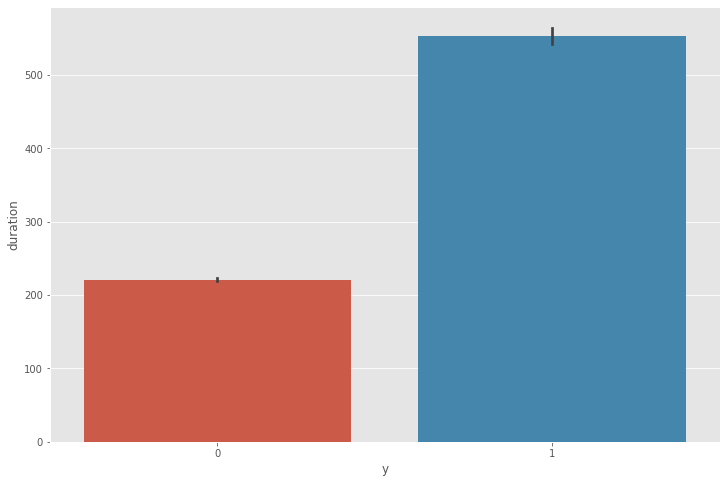

In [60]:
# Visualizing duration and y with violinplot
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="y", y="duration", data=df);

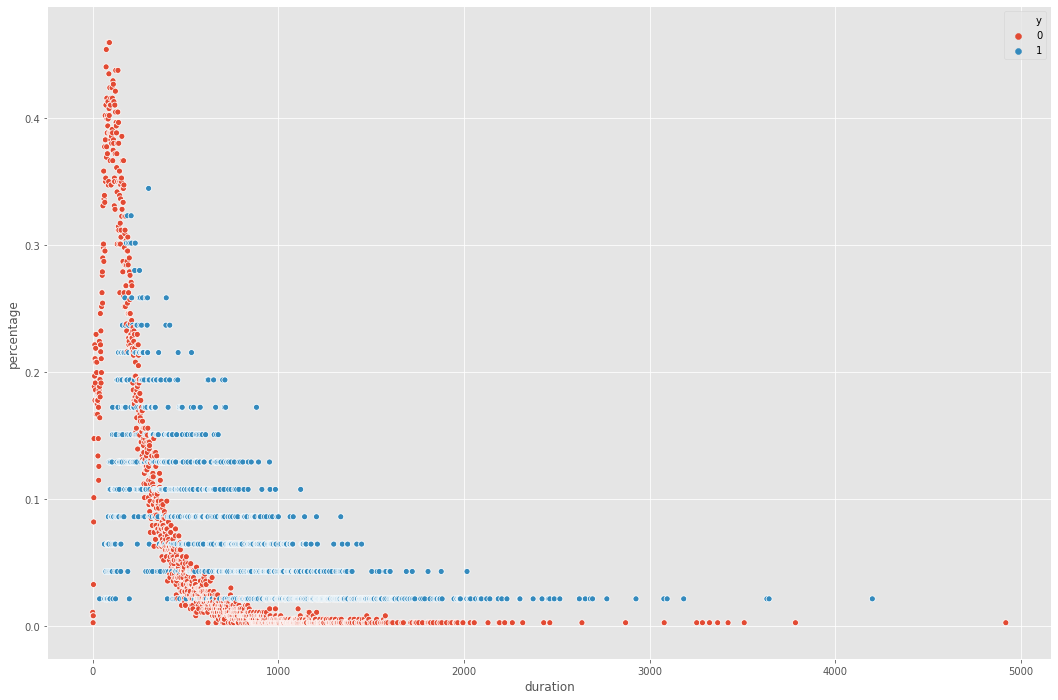

In [61]:
# Visualizing duration and y with barplot
duration_counts = (df.groupby(['y'])['duration']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('duration'))
fig, ax = plt.subplots(figsize=(18,12))
p = sns.scatterplot(x="duration", y="percentage", hue='y', data=duration_counts)

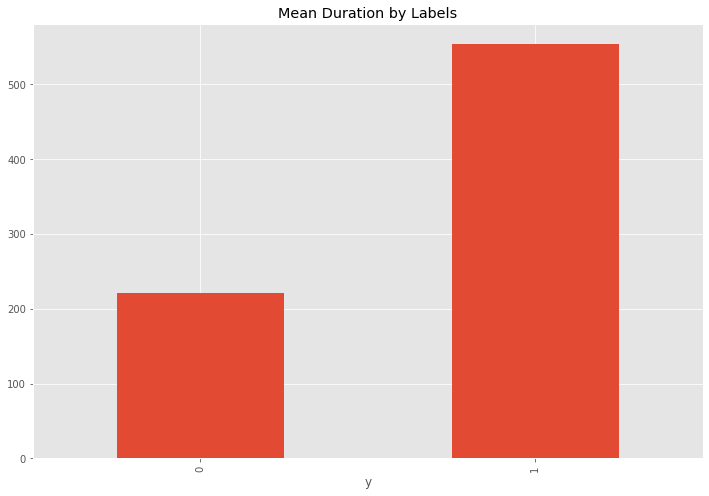

In [62]:
# Visualizing duration and y with barplot
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('y')['duration'].mean().plot.bar()
plt.title('Mean Duration by Labels');

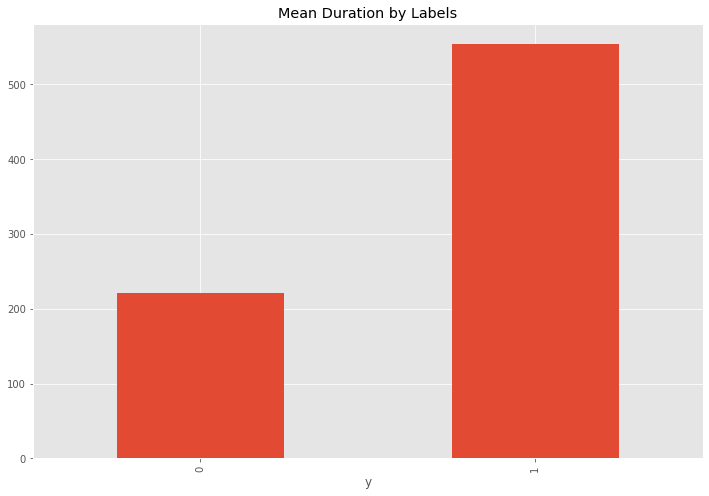

In [63]:
# Visualizing duration and y with barplot
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('y')['duration'].mean().plot.bar()
plt.title('Mean Duration by Labels');

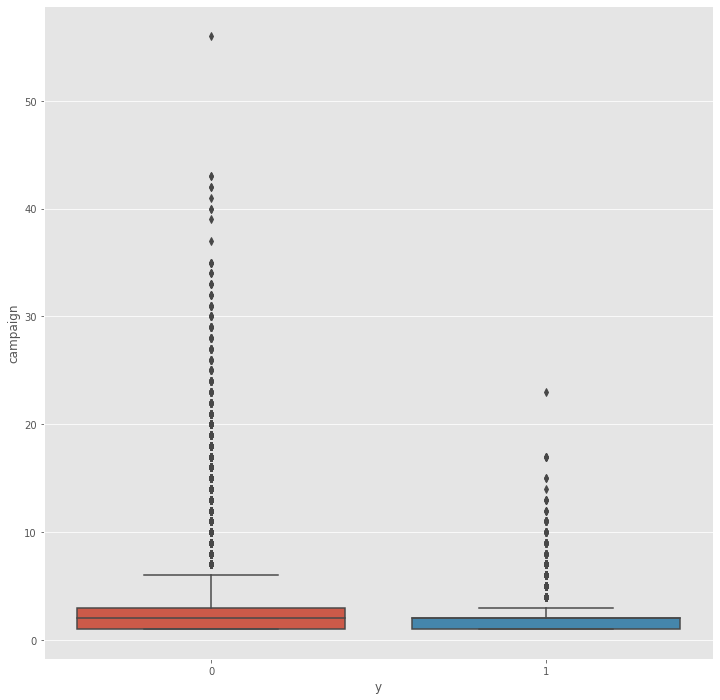

In [64]:
#Visualizing campaign and y with violinplot
fig, ax = plt.subplots(figsize=(12,12))
sns.boxplot(x="y", y="campaign", data=df);

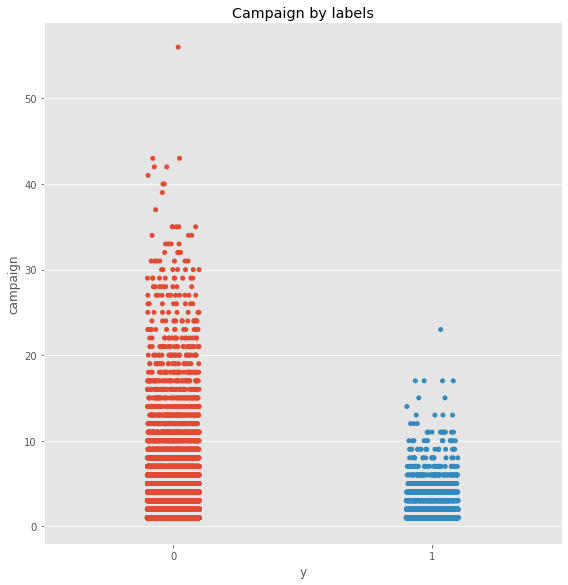

In [65]:
# Visualizing campaign and y with catplot
sns.catplot(x="y", y="campaign", data=df, height=8)
plt.title('Campaign by labels');

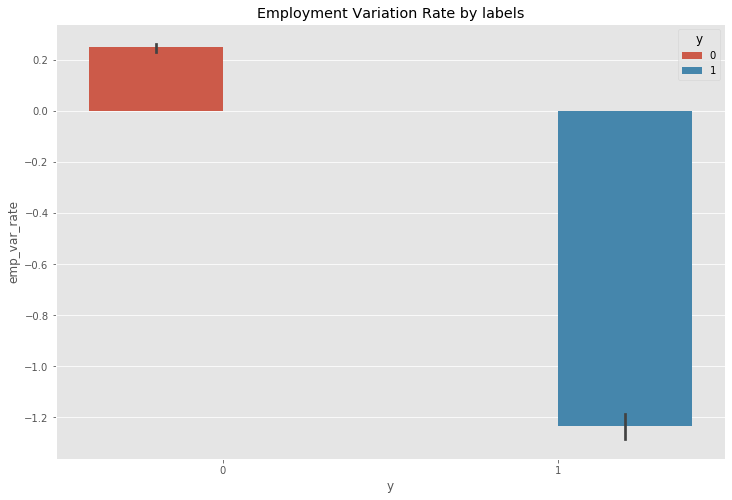

In [66]:
# Visualizing emp_var_rate and y with barplot
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='y', y='emp_var_rate', hue='y', data=df)
plt.title('Employment Variation Rate by labels');

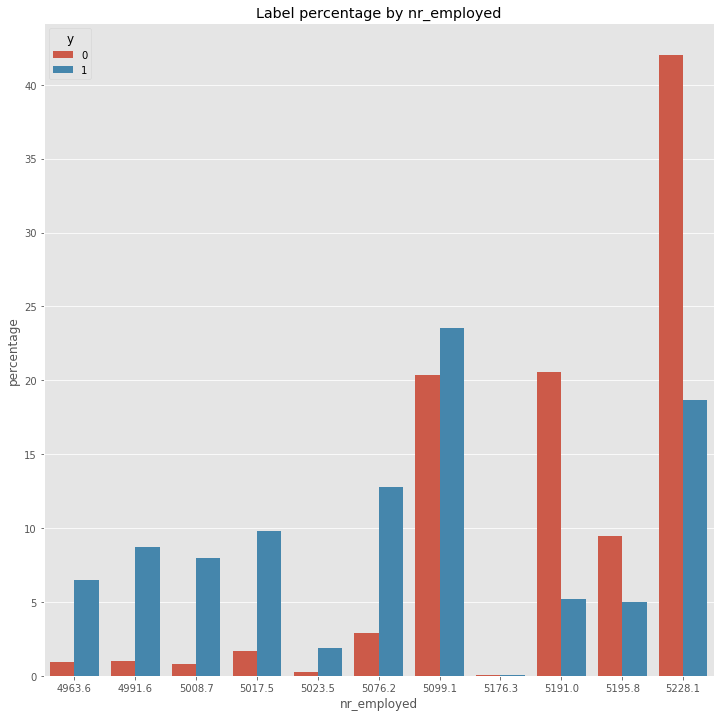

In [67]:
emp_counts = (df.groupby(['y'])['nr_employed']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('nr_employed'))
fig, ax = plt.subplots(figsize=(12,12))
p = sns.barplot(x="nr_employed", y="percentage", hue='y', data=emp_counts)
plt.title('Label percentage by nr_employed');

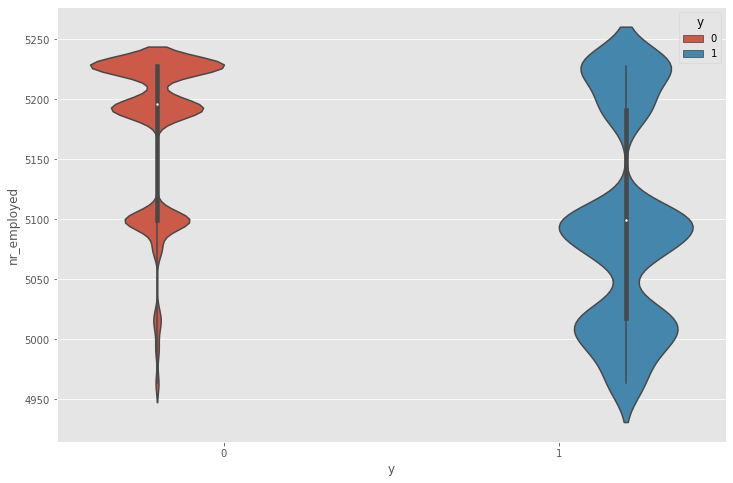

In [68]:
# Visualizing ne_employed and y with violinplot
fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot(x='y', y='nr_employed', hue='y', data=df);

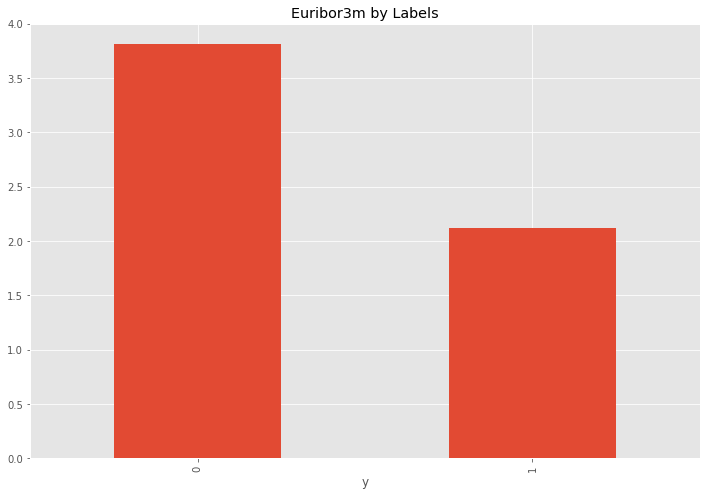

In [69]:
# Visualizing euribor3m and y with barplot
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('y')['euribor3m'].mean().plot.bar();
plt.title('Euribor3m by Labels');

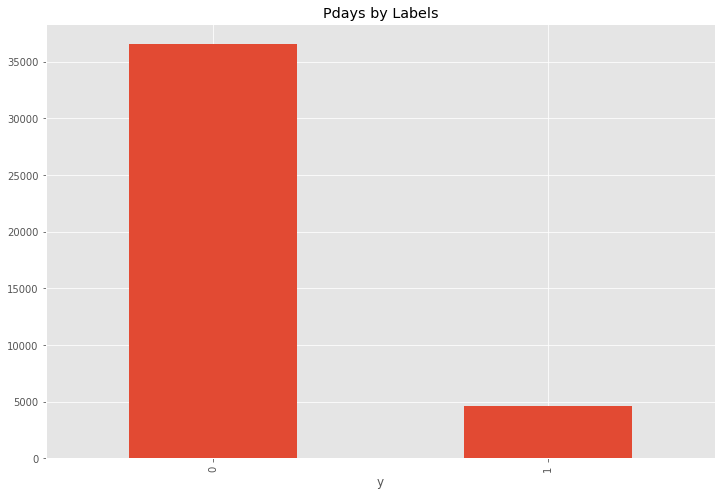

In [70]:
# Visualizing pdays and y with barplot
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('y')['pdays'].count().plot.bar()
plt.title('Pdays by Labels');

Comments:

As observed before, higher duration results with a subscription to term deposit.
As the number of campaign calls passes 10 customers are more likely to reject term deposit offer.
Lower Euribor3m rates leads to positive response from customers.
Lower Emp_var_rate result with positive response from customers.
Knowing that 999 means that a customer never contacted previously, customers contacted after high pdays or never contacted before are more likely to refuse term deposit offer.
Between the nr_employed rates 4963.6 and 5099.1 percentage of yes labels are higher than no label, between 5191.0 and 5228.1 no labels are higher than yes labels.
Knowing that nr_employed and emp_var_rate, euribor3m, cons_price_idx are highly correlated, it can be concluded that cons_price_index is also an important feature affecting our target variable.

## Feature Engineering


In [71]:
# Binning education column
dict_ed = {
    'basic_4y': 'basic',
    'basic_6y': 'basic',
    'basic_9y': 'basic',
    'illiterate': 'illiterate',
    'high_school': 'middle',
    'professional_course': 'middle',
    'university_degree': 'university_degree',

}

df['education_binned'] = df['education'].replace(dict_ed)
    
df['education_binned'].unique()

array(['basic', 'middle', 'university_degree', 'illiterate'], dtype=object)

In [72]:
# Creating season column
seasons = {
    'dec': 'winter',
    'mar': 'spring',
    'apr': 'spring',
    'may': 'spring',
    'jun': 'summer',
    'jul': 'summer',
    'aug': 'summer',
    'sep': 'fall',
    'oct': 'fall',
    'nov': 'fall',
}

df['season'] = df['month'].replace(seasons)
    
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

It is already noted that to have a realistic predictive model duration shouldn't be used. Tough it will not lead to a realistic predictive analysis to use duration in our models, to measure duration's effect on our models duration will be added to our final comparison.

## Final Model Comparison


In [107]:
# Selecting number columns
df_numeric = df.select_dtypes('number')
# Dropping y and duration_binned
df_numeric = df_numeric.drop(columns=['y'])
df_numeric.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [108]:
# One_hot_encoding for categorical variables
df_categoric = pd.get_dummies(df[df.select_dtypes('object').columns.tolist()], drop_first=True)

In [109]:
y = df['y']
X = pd.concat([df_categoric, df_numeric], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 47 columns):
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student                      41188 non-null uint8
job_technician                   41188 non-null uint8
job_unemployed                   41188 non-null uint8
marital_married                  41188 non-null uint8
marital_single                   41188 non-null uint8
education_basic_6y               41188 non-null uint8
education_basic_9y               41188 non-null uint8
education_high_school            41188 non-null uint8
education_illiterate             41188 non-null uint8
education_professional_cour

In [110]:
# Normalisation
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=random_state, test_size=0.25)

# Resampling due to class imbalance
X_train_changed,y_train_changed= sampled(X_train, y_train)

In [111]:
 #Model comparison (second iteration)¶
from helper import grid_search
import json

In [114]:

import os

if os.path.isfile('best_model_params.json'):
    with open('best_model_params.json', 'r') as file:
        model_params = json.load(file)
        
else:
    pass

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    #"XGBoost Classifier": xgb.XGBClassifier(),
    "KNN": KNeighborsClassifier()
    
}

import time

results = {}
for model_title, model  in classifiers.items():
    
    model.set_params(**model_params.get(model_title))
    t_start = time.clock()
    model.fit(X_train_changed, y_train_changed)
    t_end = time.clock()
    t_diff = t_end - t_start
    
    training_preds = model.predict(X_train_changed)
    y_pred = model.predict(X_test)
    training_accuracy = accuracy_score(y_train_changed, training_preds)
    val_accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results[model_title] = {
        'Training time': t_diff,
        'Training score': training_accuracy,
        'Test score': val_accuracy,
        'f1 Score': f1,
        'Recall Score' : recall
    }

pd.DataFrame(results).T

,Training time,Training score,Test score,f1 Score,Recall Score
Logistic Regression,0.438405,0.886854,0.865398,0.594737,0.872961
Decision Tree,0.912044,0.890484,0.856560,0.580993,0.878970
Random Forest,6.494624,0.897760,0.851996,0.577371,0.893562
Naive Bayes,0.149859,0.764408,0.769350,0.425079,0.753648
KNN,4.419079,0.938084,0.814606,0.409161,0.567382


While Naive Bayes classifier has the lowest training time, XGBoost has the highest. In terms of training, test, f1 and recall score, XGBoost has the highest score, Naive Bayes has the lowest. Both Random Forest and Logistic Regression's score are close to XGBoost's scores but their training time is much more shorter compared to XGB.

{'Logistic Regression': {'C': 3593.813663804626, 'penalty': 'l2', 'random_state': 33, 'solver': 'liblinear'}, 'Decision Tree': {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 33}, 'Random Forest': {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 250, 'random_state': 33}, 'Naive Bayes': {}, 'KNN': {}}


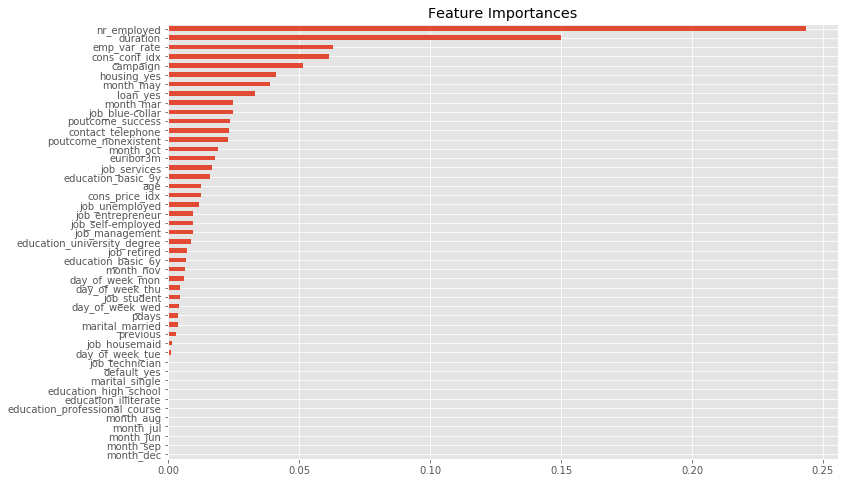



Training Accuracy: 92.59%
Validation Accuracy: 88.55%
F1 Score: 0.6263%



Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      9132
           1       0.50      0.85      0.63      1165

    accuracy                           0.89     10297
   macro avg       0.74      0.87      0.78     10297
weighted avg       0.92      0.89      0.90     10297





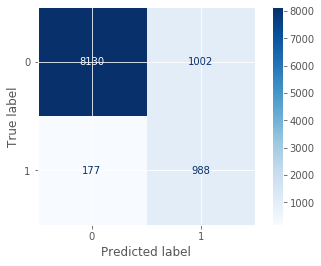

In [122]:
model = xgb.XGBClassifier()
model_name = 'XGBoost Classifier'

print(model_params)
#model.set_params(**model_params.get(model_name))
model.fit(X_train_changed, y_train_changed)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(12,8))
plt.title('Feature Importances')
plt.show()

y_pred = model.predict(X_test) 
print_accuracy_report(X_train_changed, X_test, y_train_changed, y_test, model)
print('\n') 
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

True Negatives: 8130 is the number of correct classifications of the 0/No.

False Negatives: 1002 is the number of incorrect classifications 0/No.

False Positives: 177 is the number of incorrect classifications of the 1/Yes.

True Positives: 988 is the number of correct classifications of the 1/Yes

Besides duration, it is observed that monthly or quarterly economic indicators like cons_conf_idx, emp_var_rate euribor3m, nr_employed are among the most important features. Here, it can be concluded that economic indicators are influential on people's financial decisions.

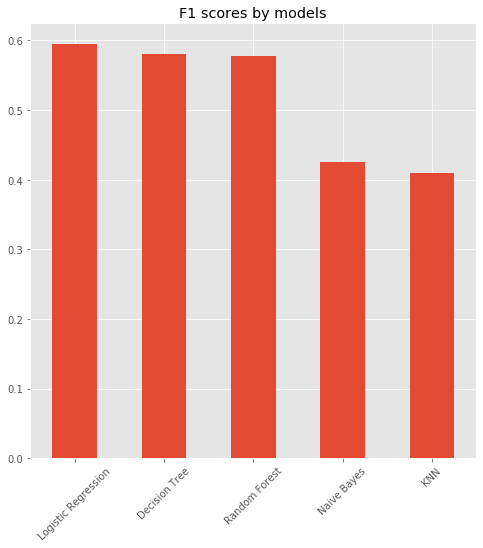

In [123]:
results_df = pd.DataFrame(results).T

fig, ax = plt.subplots(figsize=(8,8))
results_df['f1 Score'].plot.bar()
plt.xticks(rotation=45)
plt.title('F1 scores by models');

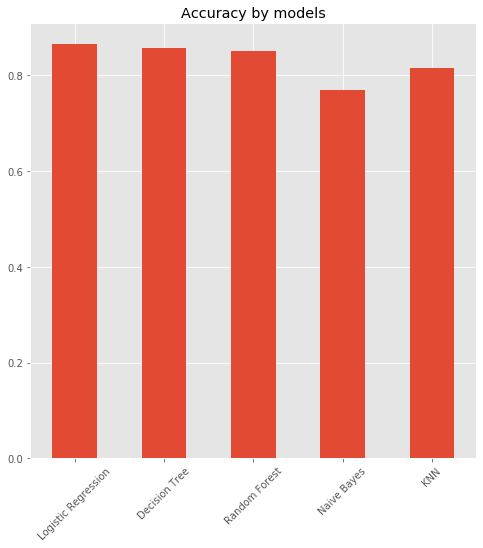

In [124]:
fig, ax = plt.subplots(figsize=(8,8))
results_df['Test score'].plot.bar();
plt.xticks(rotation=45)
plt.title('Accuracy by models');

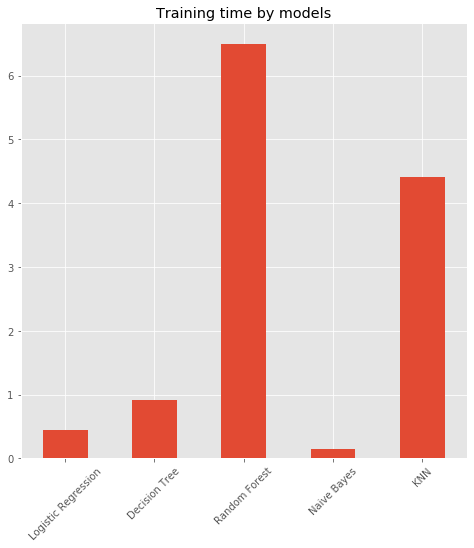

In [125]:
fig, ax = plt.subplots(figsize=(8,8))
results_df['Training time'].plot.bar();
plt.xticks(rotation=45)
plt.title('Training time by models');

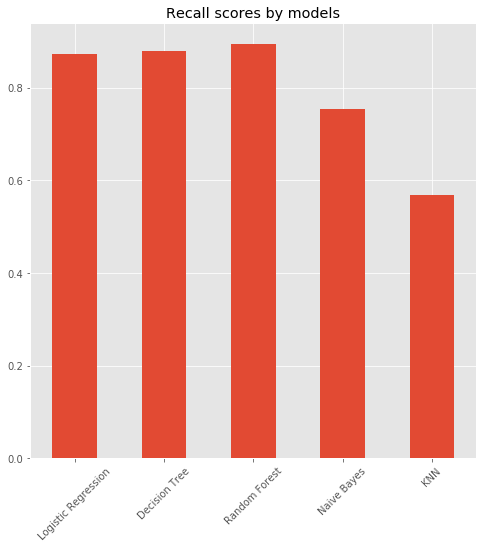

In [126]:
fig, ax = plt.subplots(figsize=(8,8))
results_df['Recall Score'].plot.bar()
plt.xticks(rotation=45)
plt.title('Recall scores by models');

## Conclusion


So after doing all predictive modeling we can conclude that the marketing campaign mostly will be targeted people who:

- have administrative jobs,
- are married,
- have university degree,
- have credit default,
- have housing loan,
- doesn't have any personal loan,
- have mobile number.

The campaign mostly targeted these segments which are more likely to subscribe term deposit.

Also, May, July and August are the months that the campaign mostly took place.
As the duration increases customers are more likely to accept term deposit.
Customers who are mostly never contacted or contacted after high pdays are more likely to refuse term deposit offer.
As the number of campaign calls passes 10 customers are more likely to reject term deposit offer.
Lower Euribor3m rates leads to positive response from customers.
Lower Emp_var_rate result with positive response from customers.
Knowing that 999 means that a customer never contacted previously, customers contacted after high pdays or never contacted before are more likely to refuse term deposit offer.
Between the nr_employed rates 4963.6 and 5099.1 percentage of yes labels are higher than no label, between 5191.0 and 5228.1 no labels are higher than yes labels.
Knowing that there is high correlation between nr_employed and emp_var_rate, euribor3m, cons_price_idx are highly correlated, it can be concluded that cons_price_index is also an important feature affecting our target variable.
Besides duration, it is observed that monthly or quarterly economic indicators like cons_conf_idx, emp_var_rate euribor3m, nr_employed are among the most important features. Here, it can be concluded that economic indicators are influential on people's financial decisions.
About Recall, Precision, Accuracy and F1 Scores:

Correctly identifying yes labels is more important than identifying no labels, with regards to the business use-case. The insights related to proportion of false negatives within relevant elements is key for the business simply because this will lead to better performing marketing campaigns which then allow the business to target potential customers effectively and therefore help lower the costs.

While Precision is the ratio of correct positive predictions to the total predicted positives, Recall is the ratio of correct positive predictions to the total positives. In our case we will be also targeting higher recall scores among others.

Among baseline models, both Naive Bayes and Logistic Regression prove the solid algorithms working behind. Naive Bayes has the shortest training time and Logistic Regression have the highest f1 score. I can be concluded that Decision Tree and XGBoost classifier are overfitting, while Random Forest algorithm proves that it can avoid overfitting without any tunning.

About Machine Learning Models:

Among baseline models, both Naive Bayes and Logistic Regression prove the solid algorithms working behind. Naive Bayes has the shortest training time and Logistic Regression have the highest f1 score. It can be concluded that Decision Tree and XGBoost classifier are overfitting, while Random Forest algorithm proves that it can avoid overfitting without any tuning.

While Naive Bayes classifier has the lowest training time, XGBoost has the highest training time. Hence, it is the computationally most expensive one. In terms of training, test, f1 and recall score, XGBoost has the highest score, Naive Bayes has the lowest. Both Random Forest and Logistic Regression's score are very close to XGBoost's scores but their training time is much more shorter compared to XGBoost.

Besides duration, it is observed that monthly or quarterly economic indicators like cons_conf_idx, emp_var_rate euribor3m, nr_employed are among the most important features for our model. Here, it can be concluded that economic indicators are influential on people's financial decisions.

### References
Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014